#**Team Name : Shecodes**


### **Team Contributions:**

|Features  |  Member |
|-----|-----|
| Title vs Body                         |  Monica Dommaraju |  
| Content Statistics                  |  Sri Sruthi Chilukuri  |  
|   Writting Style                           |  Swati Narkhede 
| Misleading Intents                 |  Asha Aher |  


### **Enrichment Dataset Details:**

- Kaggle Fakenews Dataset
- Liar Liar Dataset
- Politifact Fake news and Real News Content
- Stance Dataset from Fake News Challenge


### **Libraries Used:**

- NLTK 
- Gensim 
- Fastai
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
from google.colab import drive
import gensim
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
from gensim.models.doc2vec import TaggedDocument


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load the Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Kaggle Fake News Dataset

In [5]:
fake_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/train_fakenews.csv",sep=',')
fake_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/test_fakenews.csv",sep=',')
fake_submit = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/submit_fakenews.csv",sep=',')
fake_test = pd.merge(fake_test, fake_submit, on="id", how='left')
fake_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
fake_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
fake_test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [8]:
fake_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
 4   label   5200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 243.8+ KB


## Liar Liar Dataset

In [0]:
# Load Liar-Liar dataset
columns = [
  'jsonid', 
  'label', 
  'text', 
  'subject', 
  'speaker', 
  'speakerjobtitle', 
  'stateinfo',
  'partyaffiliation', 
  'barelytruecounts', 
  'falsecounts',
  'halftruecounts',
  'mostlytrueocunts',
  'pantsonfirecounts',
  'context'
  ]
train_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv",sep='\t', names=columns)
test_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/test.tsv",sep='\t', names=columns)
valid_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/valid.tsv",sep='\t', names=columns)

In [10]:
train_news.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [11]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jsonid             10240 non-null  object 
 1   label              10240 non-null  object 
 2   text               10240 non-null  object 
 3   subject            10238 non-null  object 
 4   speaker            10238 non-null  object 
 5   speakerjobtitle    7343 non-null   object 
 6   stateinfo          8032 non-null   object 
 7   partyaffiliation   10238 non-null  object 
 8   barelytruecounts   10238 non-null  float64
 9   falsecounts        10238 non-null  float64
 10  halftruecounts     10238 non-null  float64
 11  mostlytrueocunts   10238 non-null  float64
 12  pantsonfirecounts  10238 non-null  float64
 13  context            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


## Politifact news dataset

In [12]:
politifact_fake = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/Fake.csv",sep=',')
politifact_fake['label'] = 1
politifact_true = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/True.csv",sep=',')
politifact_true['label'] = 0
df_politifact = pd.concat([politifact_fake, politifact_true])
df_politifact.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
df_politifact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## Stance Dataset

In [0]:
train_bodies = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/stance_dataset/train_bodies.csv")
train_stances = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/stance_dataset/train_stances.csv")

In [0]:
test_bodies = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/stance_dataset/competition_test_bodies.csv")
test_stances = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/stance_dataset/competition_test_stances.csv")

In [16]:
train_stances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  49972 non-null  object
 1   Body ID   49972 non-null  int64 
 2   Stance    49972 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [17]:
train_bodies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Body ID      1683 non-null   int64 
 1   articleBody  1683 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [18]:
test_stances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25413 entries, 0 to 25412
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  25413 non-null  object
 1   Body ID   25413 non-null  int64 
 2   Stance    25413 non-null  object
dtypes: int64(1), object(2)
memory usage: 595.7+ KB


In [19]:
train_bodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [20]:
train_stances.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [0]:
final_train_stances = pd.merge(left=train_stances, right=train_bodies, how='left', left_on='Body ID', right_on='Body ID')

In [22]:
final_train_stances.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."


In [23]:
final_train_stances.isna().sum()

Headline       0
Body ID        0
Stance         0
articleBody    0
dtype: int64

In [0]:
final_test_stances = pd.merge(left=test_stances, right=test_bodies, how='left', left_on='Body ID', right_on='Body ID')

In [25]:
final_test_stances.head()

,Headline,Body ID,Stance,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated,A RESPECTED senior French police officer inves...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated,Dave Morin's social networking company Path is...
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated,A bereaved Afghan mother took revenge on the T...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated,Hewlett-Packard is officially splitting in two...
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated,An airline passenger headed to Dallas was remo...


In [26]:
final_test_stances.isnull().sum()


Headline       0
Body ID        0
Stance         0
articleBody    0
dtype: int64

In [0]:
final_stance = pd.concat([final_train_stances, final_test_stances], axis=0, ignore_index=True)

In [28]:
final_stance.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."


In [29]:
final_stance.isna().sum()

Headline       0
Body ID        0
Stance         0
articleBody    0
dtype: int64

In [30]:
final_stance.shape

(75385, 4)

In [31]:
final_stance.drop('Body ID', axis=1, inplace=True)
final_stance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75385 entries, 0 to 75384
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     75385 non-null  object
 1   Stance       75385 non-null  object
 2   articleBody  75385 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [0]:
final_stance.rename(columns={'Headline': 'title', 'articleBody': 'text', 'Stance': 'label'}, inplace=True)


In [33]:
final_stance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75385 entries, 0 to 75384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   75385 non-null  object
 1   label   75385 non-null  object
 2   text    75385 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


# Preprocessing

In [0]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)


In [35]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.12947549422581991 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.013779652118682862 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.01284959316253662 min


In [36]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/Shared drives/SheCodes/Datasets/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [39]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 3.5998936096827188 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [40]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.4203730583190918 min


In [41]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.45989428758621215 min


In [0]:
train_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/train_processed.csv", sep=',')
test_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/test_processed.csv", sep=',')
valid_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/valid_processed.csv", sep=',')

# Visualizations

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

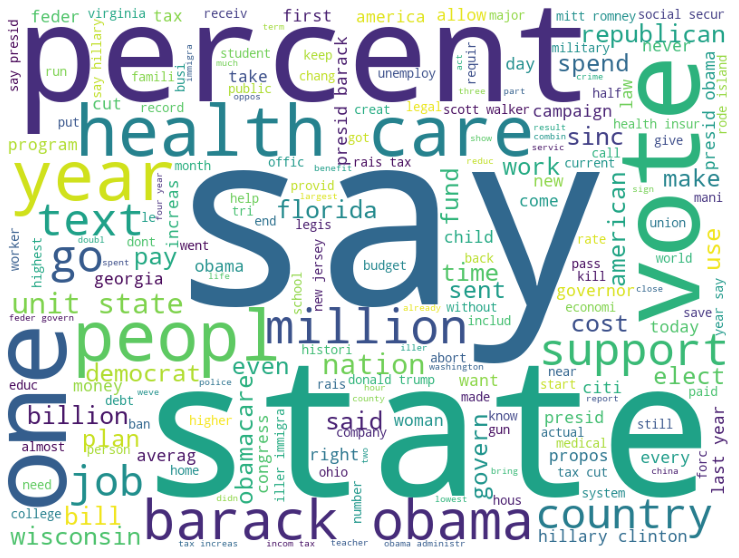

In [44]:
plot_wordcloud(' '.join(train_news['clean']))


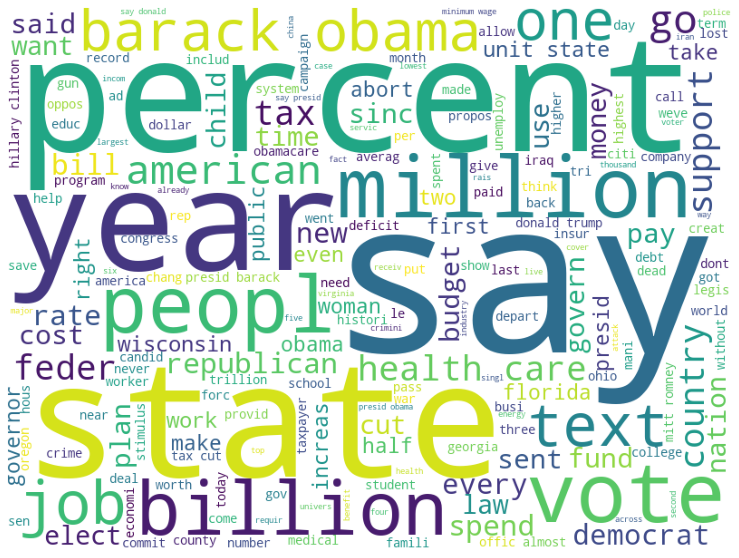

In [45]:
plot_wordcloud(' '.join(test_news['clean']))

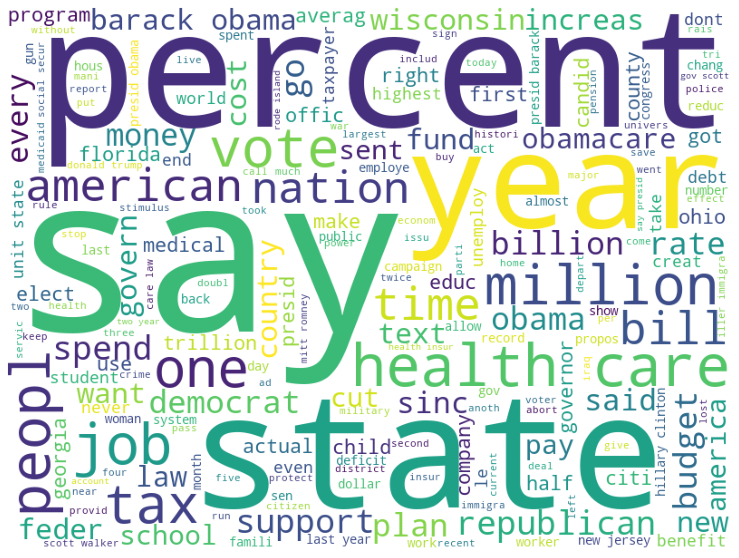

In [46]:
plot_wordcloud(' '.join(valid_news['clean']))

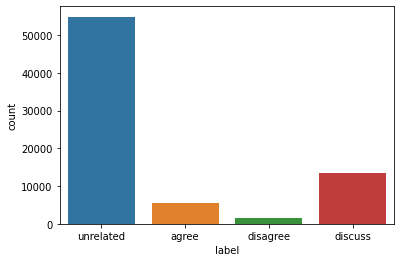

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=final_stance)
plt.show()

# Feature 1: Sentiment analysis

In [48]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [51]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

Streaming output truncated to the last 5000 lines.
[0, 0.197, 0.524, 0.279, 0.2363]
[0, 0.471, 0.529, 0.0, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.161, 0.518, 0.321, 0.4767]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.178, 0.822, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.746, 0.254, 0.7579]
[0, 0.181, 0.819, 0.0, -0.4767]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.87, 0.13, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.604, 0.396, 0.7096]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.659, 0.341, 0.4767]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.0, 0.913, 0.087, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.163, 0.

In [52]:
train_news.head(5)

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [53]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

In [54]:
test_news.head(5)

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [55]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

In [56]:
valid_news.head(5)

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


In [0]:
train_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sentiment/train_sentiment.csv", sep=',')
test_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sentiment/test_sentiment.csv", sep=',')
valid_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sentiment/valid_sentiment.csv", sep=',')

In [58]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/test_sentiment.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.943918


(True, 0.9448046694778502)

In [59]:
SentimentAnalysis = SentimentAnalysis()

Sentiment Analysis Model Trained - accuracy:   0.943918


In [60]:
def DATAMINERS_getSentimentAnalysisScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = SentimentAnalysis.predict(text)
    return (float(probValue))

print(DATAMINERS_getSentimentAnalysisScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.9448046694778502


# Feature 2: LDA Topic Modelling

In [61]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [62]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [63]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


Split the clean news into list of words

In [64]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

**Latent Dirichlet Allocation (LDA)**

It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

**Create a function to build the dictionary and tokenized docs for given feature**

Below function does the following

*   Dictionary Returns Dictionary given, dataframe and column name
*   Tokenizeddocs Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
*   Dictionary is filtered using Gensim filter_extremes Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens








In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

**Gensim filter_extremes**
Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

**Create a function to build tfidf_corpus from bow_corpus**

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

Create a function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe


## Bag of Words
**Create a dictionary and tokens**

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

Create a function to convert text to word tokens from cleaned dataset

In [73]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


**Running LDA using Bag of Words**

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [74]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['vote', 'sent', 'republican', 'support', 'state', 'democrat', 'obama', 'romney', 'percent', 'would']
1::['percent', 'state', 'time', 'averag', 'american', 'school', 'year', 'hous', 'billion', 'rais']
2::['presid', 'obama', 'country', 'bill', 'barack', 'state', 'bush', 'year', 'billion', 'florida']
3::['year', 'percent', 'school', 'would', 'budget', 'public', 'every', 'state', 'obama', 'spend']
4::['obama', 'state', 'nation', 'said', 'million', 'peopl', 'work', 'presid', 'clinton', 'text']
5::['percent', 'year', 'million', 'state', 'obama', 'time', 'rate', 'peopl', 'presid', 'wisconsin']
6::['percent', 'increas', 'american', 'peopl', 'state', 'year', 'health', 'sinc', 'care', 'vote']
7::['year', 'last', 'state', 'million', 'health', 'vote', 'creat', 'number', 'nation', 'would']
8::['health', 'care', 'state', 'year', 'cost', 'would', 'percent', 'plan', 'insur', 'budget']
9::['state', 'trump', 'unit', 'donald', 'georgia', 'want', 'clinton', 'percent', 'feder', 'iller']


**Generate TF-IDF bow_corpus**

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [75]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


**Running LDA model using Bag of Words**

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

GOAL: To get top ten topics with top words.

In [76]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['democrat', 'american', 'trump', 'state', 'creat', 'donald', 'govern', 'percent', 'republican', 'presid']
1::['percent', 'obama', 'presid', 'barack', 'school', 'state', 'year', 'america', 'county', 'unit']
2::['want', 'percent', 'vote', 'state', 'american', 'clinton', 'obama', 'rais', 'iran', 'hillary']
3::['romney', 'mitt', 'percent', 'state', 'vote', 'nation', 'obama', 'presid', 'system', 'would']
4::['health', 'care', 'year', 'spend', 'billion', 'obama', 'presid', 'state', 'iller', 'barack']
5::['percent', 'year', 'rate', 'state', 'last', 'american', 'country', 'text', 'presid', 'school']
6::['state', 'year', 'percent', 'govern', 'bill', 'feder', 'dollar', 'billion', 'vote', 'every']
7::['million', 'percent', 'state', 'rate', 'year', 'peopl', 'highest', 'nation', 'scott', 'averag']
8::['state', 'percent', 'debt', 'island', 'rode', 'nation', 'year', 'sent', 'health', 'country']
9::['obamacare', 'vote', 'obama', 'budget', 'fund', 'know', 'peopl', 'year', 'medical', 'percent']


**Semisupervised Labeling**

Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

Function to add topicnumber, topicscore, topiclabel, topwords

In [78]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642002,obama state nation said million peopl work pre...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930748,percent year million state obama time rate peo...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486886,percent increas american peopl state year heal...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654623,health care state year cost would percent plan...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.454690,year last state million health vote creat numb...


In [79]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.871365,obama state nation said million peopl work pre...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.626577,year last state million health vote creat numb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.551877,health care state year cost would percent plan...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849980,health care state year cost would percent plan...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574378,health care state year cost would percent plan...


In [80]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699911,obama state nation said million peopl work pre...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.599063,presid obama country bill barack state bush ye...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.558868,obama state nation said million peopl work pre...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,4,0.849964,obama state nation said million peopl work pre...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,0,0.575555,vote sent republican support state democrat ob...


**Visualize the LDA Distribution of news against Top 10 Topics**

GOAL 1: Each of the N documents will be represented in the LDA model by a vector of length M GOAL 2: Each of the M topics is represented by a vector of length V

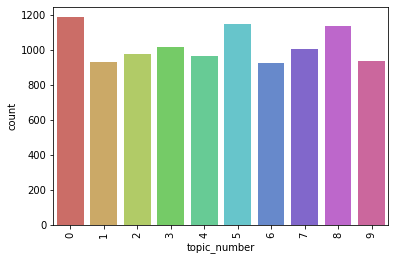

In [81]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

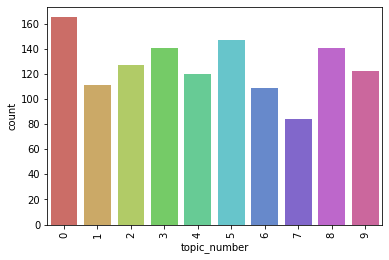

In [82]:
create_distribution(test_news)# TEST Document Vector

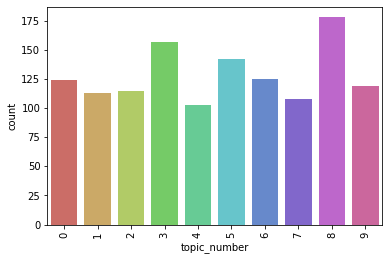

In [83]:
create_distribution(valid_news)# VALID Document Vector

Saved the latest dataset into a seperate CSV file

In [0]:
train_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/lda/train_lda.csv", sep=',')
test_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/lda/test_lda.csv", sep=',')
valid_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/lda/valid_lda.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/lda/train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/lda/test_lda.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# lda = LDATopicModelling()
# lda.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [86]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.328594


In [87]:
def DATAMINERS_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DATAMINERS_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.08185803576455541


# Feature 3: Sensational Feature Analysis
**Sensational Words Corpus**
Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

**Words that are used:**

When you are trying to sell people a solution
When you are trying to get them to take an action (like, share, subscribe, buy)
When you are trying to get people to click and read your article
When you are trying to get someone to agree with you
**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [0]:
columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/lda/train_lda.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/lda/test_lda.csv', sep=',', header=None, names = columnNames)

#dropping columns
columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index', 'topic_number', 'lda_score', 'topic_top_words']
train_news = dataTrain.drop(columns=columnsToRemove)
test_news = dataTest.drop(columns=columnsToRemove)
train_news = train_news.loc[1:] 
test_news = test_news.loc[1:]

In [89]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


**SenticNet:**

**Data Enrichment**

It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [90]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [91]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


**TF-IDF and Cosine Similarity**

**TF-IDF**

TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [93]:
tfidf_corpus.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [95]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [96]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


# valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
# print('Valid dim:', valid_tfidf.shape)
# print(valid_tfidf.A[:10])

Training dim: (10239, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1266, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Cosine Similarity Score**

The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset.

In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [98]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,headline_text,clean,sensational_score
1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.061786
2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.059743
3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.052559
4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.066800
5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.048691


In [99]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,headline_text,clean,sensational_score
1.0,Wisconsin is on pace to double the number of l...,wisconsin pace doubl number layoff year,0.019047
2.0,Says John McCain has done nothing to help the ...,say john mccain done noth help vet,0.026551
3.0,Suzanne Bonamici supports a plan that will cut...,suzanne bonamici support plan cut choice medic...,0.061022
4.0,When asked by a reporter whether hes at the ce...,ask report whether he center crimini scheme vi...,0.065230
5.0,Over the past five years the federal governmen...,past five year feder govern paid million retir...,0.066946


Saved the latest dataset into a seperate CSV file

In [0]:

train_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sensationalism/train_sensationalism.csv", sep=',')
test_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sensationalism/test_sensationalism.csv", sep=',')
valid_news.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sensationalism/valid_sensationalism.csv", sep=',')

In [101]:
import numpy as np
columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/train_sensationalism.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/test_sensationalism.csv', sep=',', header=None, names = columnNames)

dataTrain = dataTrain.loc[1:]
dataTest = dataTest.loc[1:]


dataTrain.head(5)

,jsonid,headline_text,clean,sensational_score
1,1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.0617855637213337
2,2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.05974269381960995
3,3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.05255867153636662
4,4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.0667999552542814
5,5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.04869082661404933


In [102]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
# from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        

        columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
        dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/train_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/test_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['sensational_score'].astype(str), predicted_LogR)
        print("Sensationalism Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
# sf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sensationalism Model Trained - accuracy:   0.031596


In [103]:
def DATAMINERS_getSensationalismScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = sf.predict(text)
    return (float(probValue*100))

print(DATAMINERS_getSensationalismScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.010105770859692713


# Feature 4: Political Affiliation Model

In [104]:
class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/train.tsv', sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/valid.tsv', sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/test.tsv', sep='\t', header=None, names = columnNamesPar)

    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

Party Affiliation Model Trained - accuracy:   0.565436


In [105]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np
import os

def loadJsonFiles(directory, veracity):    
    shouldAppend = False
    for filename in os.listdir(directory):
        df2 = pd.read_json(directory + filename, lines=True)
        if (shouldAppend):
            df = df.append(df2, ignore_index=True, sort=True)      
        else:
            df = df2
        df['veracity'] = veracity
        shouldAppend = True
        
            
    # removing nan values    
    df['source'].fillna("", inplace=True)
    for index, row in df.iterrows():
        if (type(row['authors']) == float):
            df.at[index, 'authors'] = []

            
    #removing unnecessary columns
    df = df.drop(columns=['keywords','meta_data','movies', 'keywords', 'summary', 'publish_date','top_img'])
    return df

def loadDataset():
    dataFake = loadJsonFiles('/content/drive/Shared drives/SheCodes/Datasets/author_credibility/FakeNewsContent/', 0)
    dataReal = loadJsonFiles('/content/drive/Shared drives/SheCodes/Datasets/author_credibility/RealNewsContent/', 1)
    return dataReal, dataFake

dataFake, dataReal = loadDataset()

dataTrainFake = dataFake[:100]
dataTrainReal = dataReal[:100]
dataTestFake = dataFake[101:]
dataTestReal = dataReal[101:]

dataTest = dataTestFake.append(dataTestReal,ignore_index=True, sort=True)      
dataTrain = dataTrainFake.append(dataTrainReal,ignore_index=True, sort=True)    
dataAll = dataFake.append(dataReal, ignore_index=True, sort=True)      
dataAll.head()

,authors,canonical_link,images,source,text,title,url,veracity
0,[],http://www.opposingviews.com/i/society/judge-t...,[http://www.opposingviews.com/sites/all/themes...,http://www.opposingviews.com,An Ohio judge ordered an attorney jailed for f...,Lawyer Jailed For Wearing Black Lives Matter P...,http://www.opposingviews.com/i/society/judge-t...,1
1,"[Matthew Karnitschnig, Janosch Delcker]",http://www.politico.eu/article/donald-trump-an...,[http://g8fip1kplyr33r3krz5b97d1.wpengine.netd...,http://politi.co,"KALLSTADT, Germany — Few places in Germany are...","Donald Trump, Germany’s disfavored son – POLITICO",http://politi.co/2df6xHB,1
2,"[Jack Shafer, Robert Strauss]",http://www.politico.com/magazine/story/2016/09...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://politi.co,"As my 25th wedding anniversary approached, I t...",Worst. President. Ever.,http://politi.co/2cGdput,1
3,"[View All Posts, Follow On Twitter, Visit Webs...",http://www.liberalamerica.org/2016/09/17/ford-...,[http://pixel.quantserve.com/pixel/p-vrcN1jdLA...,http://www.liberalamerica.org,80510 SHARES Facebook Twitter Reddit Stumbleup...,Ford Motor CEO Says Trump Is Lying AGAIN! Comp...,http://www.liberalamerica.org/2016/09/17/ford-...,1
4,"[Jack Shafer, Julian E]",http://www.politico.com/magazine/story/2016/09...,[http://static.politico.com/de/81/860012d04380...,http://politi.co,"On the night of September 26, as the house lig...",The 8 Biggest Unforced Errors in Debate History,http://politi.co/2dlg4MU,1


In [106]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

Party Affiliation Model Trained - accuracy:   0.565436


In [107]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

0.3956047752353582


# Feature 5: Click Bait

In [0]:
class Clickbait():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/clickbait/clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/clickbait/non_clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values



        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = LogisticRegression(penalty='l2', C=98.94736842105263)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)

#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb

In [109]:
# from ipynb.fs.full.m_clickbait import Clickbait
clickBait = Clickbait()

Clickbait Model Trained - accuracy:   0.975313


In [110]:
def DATAMINERS_getClickbaitScore(headline): # return between 0 and 1, being 0 = True,  1 = Fake
    if (headline == ""):
        return 0
    binaryValue, probValue = clickBait.predict(headline)
    return float(probValue)

print(DATAMINERS_getClickbaitScore("Should You bring the money now"))

0.9986359885225317


# Feature 6 : Spam Score

Function to simplify label classes

*   Original -- True
*   True -- True
*   Mostly-true -- True
*   Half-true -- True
*   Barely-true -- False
*   False -- False
*   Pants-fire -- False

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class SpamScoreFeature():
    def __init__(self): 
        #load the dataset
        columnNames = ["encoded_label", "headline_text", "sensational_vector"]
        dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/train_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/sensationalism/test_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
        
        #load the spam dictionary
        spam_dict = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/spam/spam_dict.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
        spam_dict = spam_dict.fillna(0)
        spam_dict = spam_dict.iloc[1:]
        spam_dict = spam_dict.drop_duplicates()

        # spam_dict.head(5)
        #Count vector for train data
        spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
        train_count = spamcountV.fit_transform(dataTrain['headline_text'])
       
   
        self.logR_pipeline = Pipeline([
            ('NBCV',spamcountV),
            ('nb_clf',MultinomialNB())])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['encoded_label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['encoded_label'], predicted_LogR)
        print("Spam Score Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
spamscore = SpamScoreFeature()
spamscore.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Spam Score Model Trained - accuracy:   0.000000


(True, 9.766578767457755e-05)

In [112]:
dataTrain.info()
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   authors         200 non-null    object
 1   canonical_link  174 non-null    object
 2   images          174 non-null    object
 3   source          200 non-null    object
 4   text            200 non-null    object
 5   title           200 non-null    object
 6   url             174 non-null    object
 7   veracity        200 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 12.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   authors         38 non-null     object
 1   canonical_link  33 non-null     object
 2   images          33 non-null     object
 3   source          38 non-null     object
 4   text            38 non-null     ob

In [113]:
def DATAMINERS_getSpamScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = spamscore.predict(text)
    return (float(probValue))

print(DATAMINERS_getSpamScore("Says the Annies List political group supports third-trimester abortions on demand."))

9.766578767457755e-05


# Feature 7 : Author Credibility

In [114]:
dataAllAuthorsVeracity = dataAll.copy()

fakeZero = 0
fakeOne = 0
falseMoreThanOne = 0
trueZero = 0
trueOne = 0
trueMoreThanOne = 0
for index, row in dataAllAuthorsVeracity.iterrows():
    authorsCount = len(row['authors'])
    dataAllAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
    if (authorsCount == 0):
        if (row['veracity'] == 1):
            trueZero += 1
        else:
            fakeZero += 1
    elif (authorsCount == 1):
        if (row['veracity'] == 1):
            trueOne += 1
        else:
            fakeOne += 1
    elif (authorsCount > 1):
        if (row['veracity'] == 1):
            trueMoreThanOne += 1
        else:
            falseMoreThanOne += 1

print("trueZeroAuthors=", trueZero)
print("fakeZeroAuthors=", fakeZero)
print("trueOneAuthors=", trueOne)
print("fakeOneAuthors=", fakeOne)
print("trueMoreThanOneAuthors=", trueMoreThanOne)
print("fakeMoreThanOneAuthors=", falseMoreThanOne)

columnsToRemove = ['authors', 'canonical_link', 'images', 'source','url', 'text', 'title']
dataAllAuthorsVeracity = dataAllAuthorsVeracity.drop(columns=columnsToRemove)
dataAllAuthorsVeracity.head()

trueZeroAuthors= 13
fakeZeroAuthors= 85
trueOneAuthors= 36
fakeOneAuthors= 24
trueMoreThanOneAuthors= 71
fakeMoreThanOneAuthors= 11


,veracity,authors_count
0,1,0.0
1,1,2.0
2,1,2.0
3,1,3.0
4,1,2.0


In [0]:
dataTrainAuthorsVeracity = dataTrain.copy()
dataTestAuthorsVeracity = dataTest.copy()

for index, row in dataTrainAuthorsVeracity.iterrows():
    dataTrainAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

for index, row in dataTestAuthorsVeracity.iterrows():
    dataTestAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

In [116]:
dataTrainAuthorsVeracity.info()
dataTestAuthorsVeracity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         200 non-null    object 
 1   canonical_link  174 non-null    object 
 2   images          174 non-null    object 
 3   source          200 non-null    object 
 4   text            200 non-null    object 
 5   title           200 non-null    object 
 6   url             174 non-null    object 
 7   veracity        200 non-null    int64  
 8   authors_count   200 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         38 non-null     object 
 1   canonical_link  33 non-null     object 
 2   images          33 non-null     object 
 3   source

In [117]:
import matplotlib.pyplot as plt
X_train = dataTrainAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_train = dataTrainAuthorsVeracity['veracity'].values
X_test = dataTestAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_test = dataTestAuthorsVeracity['veracity'].values.reshape(-1, 1)


from sklearn import linear_model
logClassifierAuthorsCount = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifierAuthorsCount.fit(X_train, Y_train)
predicted = logClassifierAuthorsCount.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

accuracy= 0.7105263157894737


In [118]:
def DATAMINERS_getAuthorScore(numAuthors): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(numAuthors).reshape(-1, 1)
    predicted = logClassifierAuthorsCount.predict(x)
    predicedProbTrue = logClassifierAuthorsCount.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProbTrue)

print(DATAMINERS_getAuthorScore(4))

0.00905936127024587


# Feature 8 : Source Reputation

In [119]:
import pandas as pd
dataFakeNewsSites = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/politifact-fakenews-sites.csv")
dataFakeNewsSites.head()

,site name,type of site,registration
0,16wmpo.com,imposter site,"scottsdale, ariz. **"
1,24online.news,imposter site,"panama, pa. **"
2,24wpn.com,fake news,"veles, macedonia"
3,24x365live.com,fake news,"kobenhavn, denmark"
4,247newsmedia.com,fake news,"kumanovo, macedonia"


In [120]:
dataFakeNewsSites['type of site'].unique()

array(['imposter site', 'fake news', 'parody site', 'some fake stories'],
      dtype=object)

In [121]:
for index, row in dataFakeNewsSites.iterrows():
    score = 1
    if (row['type of site'] == 'some fake stories'):
        score = 0.5
    dataFakeNewsSites.at[index, 'fake_score'] = score

dataFakeNewsSites.head()

,site name,type of site,registration,fake_score
0,16wmpo.com,imposter site,"scottsdale, ariz. **",1.0
1,24online.news,imposter site,"panama, pa. **",1.0
2,24wpn.com,fake news,"veles, macedonia",1.0
3,24x365live.com,fake news,"kobenhavn, denmark",1.0
4,247newsmedia.com,fake news,"kumanovo, macedonia",1.0


In [122]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = dataFakeNewsSites[dataFakeNewsSites['site name'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

1

# Feature 9 : Content Length

Model slope:     2.8672921260228002e-05
Model intercept: 0.41180985978637996
R2 score: 0.04612397796223422


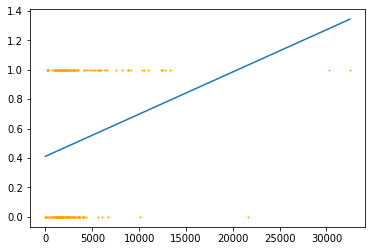

In [123]:
dataAllBodyLength = dataAll.copy()
for index, row in dataAllBodyLength.iterrows():
    textLength = len(row['text'])
    dataAllBodyLength.at[index, 'text_length'] = textLength


import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
linearRegressionBodyLength = LinearRegression(fit_intercept=True)

A = np.array(list(dataAllBodyLength.text_length))
B = np.array(list(dataAllBodyLength.veracity))

linearRegressionBodyLength.fit(A[:, np.newaxis], B)

xfit = np.linspace(-1, max(dataAllBodyLength.text_length), 1000)
yfit = linearRegressionBodyLength.predict(xfit[:, np.newaxis])

plt.scatter(A, B, s=1, c="orange")
plt.plot(xfit, yfit);

print("Model slope:    ", linearRegressionBodyLength.coef_[0])
print("Model intercept:", linearRegressionBodyLength.intercept_)
print("R2 score:", linearRegressionBodyLength.score(A[:, np.newaxis], B))

In [124]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   authors         200 non-null    object
 1   canonical_link  174 non-null    object
 2   images          174 non-null    object
 3   source          200 non-null    object
 4   text            200 non-null    object
 5   title           200 non-null    object
 6   url             174 non-null    object
 7   veracity        200 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [125]:
for index, row in dataTrain.iterrows():
    textLength = len(row['text'])
    dataTrain.at[index, 'text_length'] = textLength

for index, row in dataTest.iterrows():
    textLength = len(row['text'])
    dataTest.at[index, 'text_length'] = textLength

from sklearn import linear_model
# from sklearn import linear_model

logClassifierBodyLength = linear_model.LogisticRegression(solver='liblinear', C=17/1000, random_state=111)
logClassifierBodyLength.fit(dataTrain['text_length'].values.reshape(-1, 1), dataTrain['veracity'].values)

dataTrain.info()
dataTest.info()

predicted = logClassifierBodyLength.predict(dataTest['text_length'].values.reshape(-1, 1))

from sklearn import metrics
print(metrics.accuracy_score(dataTest['veracity'].values.reshape(-1, 1), predicted))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         200 non-null    object 
 1   canonical_link  174 non-null    object 
 2   images          174 non-null    object 
 3   source          200 non-null    object 
 4   text            200 non-null    object 
 5   title           200 non-null    object 
 6   url             174 non-null    object 
 7   veracity        200 non-null    int64  
 8   text_length     200 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         38 non-null     object 
 1   canonical_link  33 non-null     object 
 2   images          33 non-null     object 
 3   source

In [126]:
def DATAMINERS_getBodyLengthScore(length): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(length).reshape(-1, 1)
    predicted = logClassifierBodyLength.predict(x)
    predicedProb = logClassifierBodyLength.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProb)

print(DATAMINERS_getBodyLengthScore(12000))

0.19796168615586607


# Feature 10 : Word Frequency

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/train.tsv', sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/valid.tsv', sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/test.tsv', sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [128]:
wordFrequency = WordFrequency()

Word Frequency Model Trained - accuracy:   0.599053


In [129]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5104703891221551


# Feature 11: Title vs Body

**Name: Monica Dommaraju**

My main idea of Title vs Body factor analysis is to pick Title and text features from each of these datasets and try to extract as many distilled features and then run models for classsification.

Kaggle Fake News Dataset
Liar-Liar Dataset
politifact news Dataset
Stance Dataset (from FakeNews Detection Challenge)
kaggle Fake News Dataset Dataset and Politifact news dataset contains the title and text columns, but Liar-Liar Dataset contains only text column with out title text (I beleive subject feature in the Liar-Liar Dataset is not same the title). This made look for alternative datasets, so I can work on multi label classification.


Link to individual colab
[Title vs Body](https://colab.research.google.com/drive/1jDLjMqu8YDQYp-7IfpIhLHSaZ5zIlAhL?authuser=1#scrollTo=yGjX-t-MH2Oz)

## Amalgamation
**Amalgamate Kaggle Fake News Dataset and Politifact News Dataset**

In [0]:
df_kaggle = pd.concat([fake_train, fake_test])
df_kaggle.shape
# Pick only title and text columns from Kaggle dataset
df_final = df_kaggle[['title', 'text', 'label']]

In [131]:
df_final = df_final.append(df_politifact[['title', 'text', 'label']])

# Todo: Remove this sample technique when running the model finally
df_final = df_final.sample(frac=0.10).reset_index(drop=True)
df_final.head()

,title,text,label
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1


In [132]:
# Todo: Remove this sample technique when running the model finally
final_stance = final_stance.sample(frac=0.10).reset_index(drop=True)
print(final_stance.shape)
final_stance.head()

(7538, 3)


,title,label,text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru..."
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...


## Clean the title and text

In [133]:
# Cleaning on Fake News Dataset
final_stance['cleaned_title'] = final_stance["title"].map(lambda x: cleaning(x))
final_stance['cleaned_text'] = final_stance["text"].map(lambda x: cleaning(x))
final_stance.head()

,title,label,text,cleaned_title,cleaned_text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...


In [134]:
# Cleaning on Amalamated Kaggle and Fake News dataset.
print (final_stance.info())
print (df_final.info())
df_final['title'] = df_final['title'].astype('str')
df_final['text'] = df_final['text'].astype('str')
df_final['cleaned_title'] = df_final['title'].astype('str').map(lambda x: cleaning(x))
df_final['cleaned_text'] = df_final['text'].astype('str').map(lambda x: cleaning(x))
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          7538 non-null   object
 1   label          7538 non-null   object
 2   text           7538 non-null   object
 3   cleaned_title  7538 non-null   object
 4   cleaned_text   7538 non-null   object
dtypes: object(5)
memory usage: 294.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7010 non-null   object
 1   text    7086 non-null   object
 2   label   7090 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 166.3+ KB
None


,title,text,label,cleaned_title,cleaned_text
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...


##Count of sentences in Title and Text 

In [0]:
from nltk.tokenize import sent_tokenize

def count_sentences(data):
  data['count_title_sentences'] = data['title'].apply(lambda x: len(sent_tokenize(x)))
  data['count_text_sentences'] = data['text'].apply(lambda x: len(sent_tokenize(x)))

In [136]:
# Calculate the total number of sentences in Title and Text on Multiclass labeled Dataset
count_sentences(final_stance)
final_stance.head()

,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10


In [137]:
# Calculate the total number of sentences in Title and Text on Binary class labeled Dataset
count_sentences(df_final)
df_final.head()

,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7


## Generating N-Grams and Their Lengths

Uni, Bi and Tri grams are generated so we can extract some count fearures for each of these grams along with the count features of sentences.

In [0]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def ngram(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [ '_'.join(grams) for grams in n_grams]

In [0]:
def generate_ngram_features(data):
  data["title_unigram"] = data["cleaned_title"].map(lambda x: ngram(x, 1))
  data["text_unigram"] = data["cleaned_text"].map(lambda x: ngram(x, 1))
  data["count_title_unigram"] = list(data.apply(lambda x: len(x['title_unigram']), axis=1))
  data["count_text_unigram"] = list(data.apply(lambda x: len(x['text_unigram']), axis=1))
  data["unique_count_title_unigram"] = list(data.apply(lambda x: len(set(x['title_unigram'])), axis=1))
  data["unique_count_text_unigram"] = list(data.apply(lambda x: len(set(x['text_unigram'])), axis=1))

  data["title_bigram"] = data["cleaned_title"].map(lambda x: ngram(x, 2))
  data["text_bigram"] = data["cleaned_text"].map(lambda x: ngram(x, 2))
  data["count_title_bigram"] = list(data.apply(lambda x: len(x['title_bigram']), axis=1))
  data["count_text_bigram"] = list(data.apply(lambda x: len(x['text_bigram']), axis=1))
  data["unique_count_title_bigram"] = list(data.apply(lambda x: len(set(x['title_bigram'])), axis=1))
  data["unique_count_text_bigram"] = list(data.apply(lambda x: len(set(x['text_bigram'])), axis=1))

  data["title_trigram"] = data["cleaned_title"].map(lambda x: ngram(x, 3))
  data["text_trigram"] = data["cleaned_text"].map(lambda x: ngram(x, 3))
  data["count_title_trigram"] = list(data.apply(lambda x: len(x['title_trigram']), axis=1))
  data["count_text_trigram"] = list(data.apply(lambda x: len(x['text_trigram']), axis=1))
  data["unique_count_title_trigram"] = list(data.apply(lambda x: len(set(x['title_trigram'])), axis=1))
  data["unique_count_text_trigram"] = list(data.apply(lambda x: len(set(x['text_trigram'])), axis=1))

In [140]:
# Generate n-grams of title and text. Then calculate the length of unigram, bigram and trigrams on Multiclass labeled DS
generate_ngram_features(final_stance)
final_stance.head()

,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex_fuck, intersex_...","[polic_stop_arrest, stop_arrest_peopl, arrest_...",6,156,6,154
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10,"[new, rumour, suggest, appl, watch, launch, fe...","[barack, michell, obama, riyadh, today, meet, ...",7,152,7,114,"[new_rumour, rumour_suggest, suggest_appl, app...","[barack_michell, michell_obama, obama_riyadh, ...",6,151,6,141,"[new_rumour_suggest, rumour_suggest_appl, sugg...","[barack_michell_obama, michell_obama_riyadh, o...",5,150,5,150


In [141]:
# Generate n-grams of title and text. Then calculate the length of unigram, bigram and trigrams on Binary class labeled DS
generate_ngram_features(df_final)
df_final.head()

,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_p...",14,75,14,75
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7,"[press, releas, foreign, minist, sergey, lavro...","[post, origin, publish, site, octob, foreign, ...",20,123,18,108,"[press_releas, releas_foreign, foreign_minist,...","[post_origin, origin_publish, publish_site, si...",19,122,19,121,"[press_releas_foreign, releas_foreign_minist, ...","[post_origin_publish, origin_publish_site, pub...",18,121,18,121


## Common N-grams between Title and Text

In [0]:
def common_ngrams_in_text(data):
  data["count_title_unigrams_in_text"] =  list(data.apply(lambda x: sum([1. for w in x['title_unigram'] if w in set(x['text_unigram'])]), axis=1))
  data["count_title_bigrams_in_text"] =  list(data.apply(lambda x: sum([1. for w in x['title_bigram'] if w in set(x['text_bigram'])]), axis=1))
  data["count_title_trigrams_in_text"] =  list(data.apply(lambda x: sum([1. for w in x['title_trigram'] if w in set(x['text_trigram'])]), axis=1))

In [143]:
# Calculate the total number of common title n-grams in the text on Multi class labeled DS
common_ngrams_in_text(final_stance)
final_stance.head()

,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331,1.0,0.0,0.0
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91,1.0,0.0,0.0
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122,3.0,0.0,0.0
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex_fuck, intersex_...","[polic_stop_arrest, stop_arrest_peopl, arrest_...",6,156,6,154,0.0,0.0,0.0
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10,"[new, rumour, suggest, appl, watch, launch, fe...","[barack, michell, obama, riyadh, today, meet, ...",7,152,7,114,"[new_rumour, rumour_suggest, suggest_appl, app...","[barack_michell, michell_obama, obama_riyadh, ...",6,151,6,141,"[new_rumour_suggest, rumour_suggest_appl, sugg...","[barack_michell_obama, michell_obama_riyadh, o...",5,150,5,150,1.0,0.0,0.0


In [144]:
# Calculate the total number of common title n-grams in the text on Binary class labeled DS
common_ngrams_in_text(df_final)
df_final.head()

,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499,4.0,1.0,0.0
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559,3.0,0.0,0.0
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520,5.0,1.0,0.0
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_p...",14,75,14,75,10.0,5.0,2.0
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7,"[press, releas, foreign, minist, sergey, lavro...","[post, origin, publish, site, octob, foreign, ...",20,123,18,108,"[press_releas, releas_foreign, foreign_minist,...","[post_origin, origin_publish, publish_site, si...",19,122,19,121,"[press_releas_foreign, releas_foreign_minist, ...","[post_origin_publish, origin_publish_site, pub...",18,121,18,121,16.0,13.0,11.0


## TF_IDF and Cosine Similarities

In [0]:
def concat_title_text(data):
  data['cleaned_title_text'] = data['cleaned_title'] + ' ' + data['cleaned_text']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(data):
  concat_title_text(data)
  combined_vectors = TfidfVectorizer(ngram_range=(1, 2), min_df=1, max_df=1, use_idf=True, smooth_idf=True)
  combined_vectors.fit(data["cleaned_title_text"])
  combined_vectors_dictionary = combined_vectors.vocabulary_
  # print (combined_vectors_dictionary)

  # Now lets generate the TfIdf Vectors seperately for Title and Text from the vector dictionary
  # built above
  title_vectors = TfidfVectorizer(ngram_range=(1, 2), min_df=1, max_df=1, use_idf=True, smooth_idf=True, vocabulary=combined_vectors_dictionary)
  title_tfidf_vectors = title_vectors.fit_transform(data['cleaned_title'])
  print (title_tfidf_vectors.shape)
  # print ("\n Title TF-IDF Vectors")
  # print (title_vectors.get_feature_names())     

  text_vectors = TfidfVectorizer(ngram_range=(1, 2), min_df=1, max_df=1, use_idf=True, smooth_idf=True, vocabulary=combined_vectors_dictionary)
  text_tfidf_vectors = text_vectors.fit_transform(data['cleaned_text'])

  # print ("\n Text TF-IDF Vectors")
  # print (text_vectors.get_feature_names())
  print (text_tfidf_vectors.shape)

  return title_tfidf_vectors, text_tfidf_vectors

In [0]:
from scipy.spatial.distance import cosine

def similarity_score(data, title_vectors, text_vectors):
  similarity_score = []
  for i in range(len(data)):
      similarity_score.append(1 - cosine(title_vectors[i], text_vectors[i]))
  return similarity_score

def tf_idf_similarity_score(data):
  title_tfidf_vectors, text_tfidf_vectors = tf_idf(data)
  data['similarity_title_text'] = similarity_score(data, title_tfidf_vectors.toarray(), text_tfidf_vectors.toarray())
  return title_tfidf_vectors, text_tfidf_vectors

In [148]:
# Tf-IDF and Cosine Similarities on Multiclass labeled dataset
stance_title_tfidf_vectors, stance_text_tfidf_vectors = tf_idf_similarity_score(final_stance)
final_stance.head()

(7538, 5388)
(7538, 5388)


,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331,1.0,0.0,0.0,miracl cat claw way grave five day buri islam ...,0.0
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91,1.0,0.0,0.0,hard evid isi claim kidnap canadian isra woman...,NaN
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122,3.0,0.0,0.0,cnn play chill audio record alleg michael brow...,0.0
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex_fuck, intersex_...","[polic_stop_arrest, stop_arrest_peopl, arrest_...",6,156,6,154,0.0,0.0,0.0,ladi fb intersex fuck michael phelp first date...,NaN
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10,"[new, rumour, suggest, appl, watch, launch, fe...","[barack, michell, obama, riyadh, today, meet, ...",7,152,7,114,"[new_rumour, rumour_suggest, suggest_appl, app...","[barack_michell, michell_obama, obama_riyadh, ...",6,151,6,141,"[new_rumour_suggest, rumour_suggest_appl, sugg...","[barack_michell_obama, michell_obama_riyadh, o...",5,150,5,150,1.0,0.0,0.0,new rumour suggest appl watch launch februari ...,NaN


In [149]:
# Tf-IDF and Cosine Similarities on Binary class labeled dataset

df_title_tfidf_vectors, df_text_tfidf_vectors = tf_idf_similarity_score(df_final)
df_final.head()

(7090, 2552)
(7090, 2552)


,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499,4.0,1.0,0.0,red scare put pressur indonesian presid jakart...,NaN
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559,3.0,0.0,0.0,agoni digit teas new york time breadcrumb drop...,0.000000
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520,5.0,1.0,0.0,democrat legal expert shock left take statu vi...,NaN
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_p...",14,75,14,75,10.0,5.0,2.0,az rancher live u mexico border destroy nanci ...,0.639094
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7,"[press, releas, foreign, minist, sergey, lavro...","[post, origin, publish, site, octob, foreign, ...",20,123,18,108,"[press_releas, releas_foreign, foreign_minist,...","[post_origin, origin_publish, publish_site, si...",19,122,19,121,"[press_releas_foreign, releas_foreign_minist, ...","[post_origin_publish, origin_publish_site, pub...",18,121,18,121,16.0,13.0,11.0,press releas foreign minist sergey lavrov meet...,0.495823


## Word2Vec using Google Corpus and Similarity scores

Now we will generate the word vectors for title and text by training each of the unigram words on Google News corpus. This is used to find synonyms for a word, which will then be used to calculate the similaries scores between the synonyms rather than the exact words.

To use Word2Vec, we need title and text with out lemmatization and stop words performed on it.


In [0]:
def cleaning_simple_tokenize(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    return np.array(news_words)

In [0]:
import gensim

google_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/Shared drives/SheCodes/Datasets/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

In [0]:
from sklearn.preprocessing import normalize
import functools 

def sum_word2vec_scores(words):
  scores = []
  for word in words:
    if (word in google_model):
      scores.append(np.sum(google_model[word]))


    
  # a = [x + y for x, y in zip(arr, [0.] * 300)]
  zeros_arr = np.array([0.] * 300)
  print(300 - len(scores))
  scores = np.pad(scores, (0, 300 - len(scores)), 'constant')
  a = np.add(scores, zeros_arr)
  print (len(a))
  return a
  

def word2vec(data, title_column, text_column):
  # title_word2vec = data[title_column].map(lambda x: sum_word2vec_scores(x))
  text_word2vec = data[text_column].map(lambda x: sum_word2vec_scores(x))
  return title_word2vec, text_word2vec

In [0]:
from sklearn.preprocessing import normalize
from functools import reduce

def word2vec_similarity_score(data):
  data['word2vec_cleaned_title'] = data["title"].map(lambda x: cleaning_simple_tokenize(x))
  data['word2vec_cleaned_text'] = data["text"].map(lambda x: cleaning_simple_tokenize(x))

  title_word2vec = data['word2vec_cleaned_title'].map(lambda words: reduce(np.add, [google_model[word] for word in words if word in google_model], [0.]*300))
  text_word2vec = data['word2vec_cleaned_text'].map(lambda words: reduce(np.add, [google_model[word] for word in words if word in google_model], [0.]*300))

  data['word2vec_similarity_title_text'] = similarity_score(data, np.array(title_word2vec), np.array(text_word2vec))



In [155]:
# Word2Vec and Cosine Similarities on Multiclass labeled dataset

word2vec_similarity_score(final_stance)
final_stance.head()


,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331,1.0,0.0,0.0,miracl cat claw way grave five day buri islam ...,0.0,"[miracle, cat, claws, its, way, out, of, its, ...","[islamic, state, has, turned, its, hand, to, h...",0.675534
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91,1.0,0.0,0.0,hard evid isi claim kidnap canadian isra woman...,NaN,"[no, hard, evidence, of, isis, claims, it, kid...","[thirty, year, old, dimitry, nikolaev, a, marr...",0.556429
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122,3.0,0.0,0.0,cnn play chill audio record alleg michael brow...,0.0,"[cnn, plays, chilling, audio, recording, alleg...","[a, man, with, a, rifle, shot, a, soldier, sta...",0.616518
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex_fuck, intersex_...","[polic_stop_arrest, stop_arrest_peopl, arrest_...",6,156,6,154,0.0,0.0,0.0,ladi fb intersex fuck michael phelp first date...,NaN,"[lady, on, fb, i, m, intersex, and, fucked, mi...","[police, will, stop, arresting, people, for, l...",0.396037
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10,"[new, rumour, suggest, appl, watch, launch, fe...","[barack, michell, obama, riyadh, today, meet, ...",7,152,7,114,"[new_rumour, rumour_suggest, suggest_appl, app...","[barack_mich

In [156]:
# Word2Vec and Cosine Similarities on Binary Class labeled dataset

word2vec_similarity_score(df_final)
df_final.head()

,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499,4.0,1.0,0.0,red scare put pressur indonesian presid jakart...,NaN,"[red, scare, puts, pressure, on, indonesian, p...","[jakarta, reuters, indonesian, police, will, d...",0.556338
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559,3.0,0.0,0.0,agoni digit teas new york time breadcrumb drop...,0.000000,"[the, agony, of, the, digital, tease, the, new...","[there, was, the, breadcrumb, dropped, on, val...",0.660343
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520,5.0,1.0,0.0,democrat legal expert shock left take statu vi...,NaN,"[democrat, legal, expert, shocks, the, left, w...","[legal, expert, and, constitutional, law, prof...",0.713827
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_p...",14,75,14,75,10.0,5.0,2.0,az rancher live u mexico border destroy nanci ...,0.639094,"[az, ranchers, living, on, us, mexico, border,...","[twisted, reasoning, is, all, that, comes, fro...",0.819708
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7,"[press, releas, foreign, minist, sergey, lavro...","[post, origin, publish, site, octob, foreign, ...",20,123,18,108,"[press_releas, releas_foreign, foreign_minist,...","[post_origin, origin_publish, publish_site, si...",19,122,19,121,"[pr

## LSA Topic Modelling using SVD and Cosine Similarities

Lets now try to find topics from the title and text using SVD. Then find the cosine similarity between the generated title and text topics


In [0]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import vstack

def svd(data, title_tfidf_vectors, text_tfidf_vectors):
  truncated_svd = TruncatedSVD(n_components=15, n_iter=10)
  combined_vectors = vstack([title_tfidf_vectors, text_tfidf_vectors])
  truncated_svd.fit(combined_vectors)

  title_svd = truncated_svd.transform(title_tfidf_vectors)
  print (title_svd.shape)
  text_svd = truncated_svd.transform(text_tfidf_vectors)
  print (text_svd.shape)
  return title_svd, text_svd

def topic_similarity_score(data, title_tfidf_vectors, text_tfidf_vectors):
  title_svd_vectors, text_svd_vectors = svd(data, title_tfidf_vectors, text_tfidf_vectors)
  data['topics_similarity_title_text'] = similarity_score(data, title_svd_vectors, text_svd_vectors)

In [158]:
# LSA Topic Modelling and Cosine Similarities on Multi Class labeled dataset
topic_similarity_score(final_stance, stance_title_tfidf_vectors, stance_text_tfidf_vectors)
final_stance.head()

(7538, 15)
(7538, 15)


,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text,topics_similarity_title_text
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331,1.0,0.0,0.0,miracl cat claw way grave five day buri islam ...,0.0,"[miracle, cat, claws, its, way, out, of, its, ...","[islamic, state, has, turned, its, hand, to, h...",0.675534,-0.010951
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91,1.0,0.0,0.0,hard evid isi claim kidnap canadian isra woman...,NaN,"[no, hard, evidence, of, isis, claims, it, kid...","[thirty, year, old, dimitry, nikolaev, a, marr...",0.556429,NaN
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122,3.0,0.0,0.0,cnn play chill audio record alleg michael brow...,0.0,"[cnn, plays, chilling, audio, recording, alleg...","[a, man, with, a, rifle, shot, a, soldier, sta...",0.616518,0.055128
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex_fuck, intersex_...","[polic_stop_arrest, stop_arrest_peopl, arrest_...",6,156,6,154,0.0,0.0,0.0,ladi fb intersex fuck michael phelp first date...,NaN,"[lady, on, fb, i, m, intersex, and, fucked, mi...","[police, will, stop, arresting, people, for, l...",0.396037,NaN
4,New Rumour Suggests Apple Watch to Launch in F...,unrelated,Barack and Michelle Obama are in Riyadh today ...,new rumour suggest appl watch launch februari,barack michell obama riyadh today meet saudi a...,1,10,"[new, rumour, suggest, appl, watch, launch, fe...","[barack, michell, obama, riyadh, today, meet, ...",7,152,7,114,"[new_rum

In [159]:
# LSA Topic Modelling and Cosine Similarities on Binary Class labeled dataset

topic_similarity_score(df_final, df_title_tfidf_vectors, df_text_tfidf_vectors)
df_final.head()

(7090, 15)
(7090, 15)


,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text,topics_similarity_title_text
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499,4.0,1.0,0.0,red scare put pressur indonesian presid jakart...,NaN,"[red, scare, puts, pressure, on, indonesian, p...","[jakarta, reuters, indonesian, police, will, d...",0.556338,NaN
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559,3.0,0.0,0.0,agoni digit teas new york time breadcrumb drop...,0.000000,"[the, agony, of, the, digital, tease, the, new...","[there, was, the, breadcrumb, dropped, on, val...",0.660343,0.995195
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520,5.0,1.0,0.0,democrat legal expert shock left take statu vi...,NaN,"[democrat, legal, expert, shocks, the, left, w...","[legal, expert, and, constitutional, law, prof...",0.713827,NaN
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_p...",14,75,14,75,10.0,5.0,2.0,az rancher live u mexico border destroy nanci ...,0.639094,"[az, ranchers, living, on, us, mexico, border,...","[twisted, reasoning, is, all, that, comes, fro...",0.819708,0.971507
4,Press release on Foreign Minister Sergey Lavro...,This post was originally published on this sit...,1,press releas foreign minist sergey lavrov meet...,post origin publish site octob foreign minist ...,1,7,"[press, releas, foreign, minist, sergey, lavro...","[post, origin, publish, site, octob, foreign, ...",20,123,18,108,"[press_releas, releas_foreign, foreign_minist,...","[post_origin, 

## Sentiment Analysis and Cosine Similaties

Now lets assign polarity sentiment score to the title and text.


In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

def compute_sentiment(sentences):
    result = []
    for sentence in sentences:
        vs = sentiment_analyzer.polarity_scores(sentence)
        result.append(vs)
    return pd.DataFrame(result).mean()

def title_sentiment(data):
  data['title_sentences'] = data['title'].apply(lambda x: sent_tokenize(x))
  data = pd.concat([data, data['title_sentences'].apply(lambda x: compute_sentiment(x))], axis=1)
  data.rename(columns={'compound':'title_compound', 'neg':'title_neg', 'neu':'title_neu', 'pos':'title_pos'}, inplace=True)
  return data


def text_sentiment(data):
  data['text_sentences'] = data['text'].apply(lambda x: sent_tokenize(x))
  data = pd.concat([data, data['text_sentences'].apply(lambda x: compute_sentiment(x))], axis=1)
  data.rename(columns={'compound':'text_compound', 'neg':'text_neg', 'neu':'text_neu', 'pos':'text_pos'}, inplace=True)
  return data

In [161]:
# Sentiment Analysis on Multi Class labeled dataset

final_stance = title_sentiment(final_stance)
final_stance = text_sentiment(final_stance)
final_stance.head()

,title,label,text,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text,topics_similarity_title_text,title_sentences,title_neg,title_neu,title_pos,title_compound,text_sentences,text_neg,text_neu,text_pos,text_compound
0,MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAVE...,unrelated,Islamic State has turned its hand to human org...,miracl cat claw way grave five day buri,islam state turn hand human organ traffick fun...,1,20,"[miracl, cat, claw, way, grave, five, day, buri]","[islam, state, turn, hand, human, organ, traff...",8,421,8,208,"[miracl_cat, cat_claw, claw_way, way_grave, gr...","[islam_state, state_turn, turn_hand, hand_huma...",7,420,7,309,"[miracl_cat_claw, cat_claw_way, claw_way_grave...","[islam_state_turn, state_turn_hand, turn_hand_...",6,419,6,331,1.0,0.0,0.0,miracl cat claw way grave five day buri islam ...,0.0,"[miracle, cat, claws, its, way, out, of, its, ...","[islamic, state, has, turned, its, hand, to, h...",0.675534,-0.010951,[MIRACLE CAT CLAWS ITS WAY OUT OF ITS OWN GRAV...,0.134,0.670,0.196,0.2960,[Islamic State has turned its hand to human or...,0.136750,0.825300,0.037950,-0.351580
1,'No hard evidence' of Isis claims it kidnapped...,unrelated,"Thirty-year-old Dimitry Nikolaev, a married Ru...",hard evid isi claim kidnap canadian isra woman...,thirti year old dimitri nikolaev marri russian...,1,7,"[hard, evid, isi, claim, kidnap, canadian, isr...","[thirti, year, old, dimitri, nikolaev, marri, ...",10,93,10,85,"[hard_evid, evid_isi, isi_claim, claim_kidnap,...","[thirti_year, year_old, old_dimitri, dimitri_n...",9,92,9,92,"[hard_evid_isi, evid_isi_claim, isi_claim_kidn...","[thirti_year_old, year_old_dimitri, old_dimitr...",8,91,8,91,1.0,0.0,0.0,hard evid isi claim kidnap canadian isra woman...,NaN,"[no, hard, evidence, of, isis, claims, it, kid...","[thirty, year, old, dimitry, nikolaev, a, marr...",0.556429,NaN,['No hard evidence' of Isis claims it kidnappe...,0.265,0.735,0.000,-0.3818,"[Thirty-year-old Dimitry Nikolaev, a married R...",0.082714,0.864857,0.052429,-0.103243
2,CNN plays chilling audio recording allegedly f...,unrelated,A man with a rifle shot a soldier standing gua...,cnn play chill audio record alleg michael brow...,man rifl shot soldier stand guard war memori d...,1,14,"[cnn, play, chill, audio, record, alleg, micha...","[man, rifl, shot, soldier, stand, guard, war, ...",11,125,11,83,"[cnn_play, play_chill, chill_audio, audio_reco...","[man_rifl, rifl_shot, shot_soldier, soldier_st...",10,124,10,112,"[cnn_play_chill, play_chill_audio, chill_audio...","[man_rifl_shot, rifl_shot_soldier, shot_soldie...",9,123,9,122,3.0,0.0,0.0,cnn play chill audio record alleg michael brow...,0.0,"[cnn, plays, chilling, audio, recording, alleg...","[a, man, with, a, rifle, shot, a, soldier, sta...",0.616518,0.055128,[CNN plays chilling audio recording allegedly ...,0.073,0.795,0.132,0.2263,[A man with a rifle shot a soldier standing gu...,0.111429,0.888571,0.000000,-0.327814
3,"Lady on FB: I'm 41, Intersex, and Fucked Micha...",unrelated,Police will stop arresting people for low-leve...,ladi fb intersex fuck michael phelp first date,polic stop arrest peopl low level possess mari...,1,10,"[ladi, fb, intersex, fuck, michael, phelp, fir...","[polic, stop, arrest, peopl, low, level, posse...",8,158,8,116,"[ladi_fb, fb_intersex, intersex_fuck, fuck_mic...","[polic_stop, stop_arrest, arrest_peopl, peopl_...",7,157,7,148,"[ladi_fb_intersex, fb_intersex

In [162]:
# Sentiment Analysis on Binary Class labeled dataset

df_final = title_sentiment(df_final)
df_final = text_sentiment(df_final)
df_final.head()

,title,text,label,cleaned_title,cleaned_text,count_title_sentences,count_text_sentences,title_unigram,text_unigram,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,title_bigram,text_bigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,title_trigram,text_trigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,cleaned_title_text,similarity_title_text,word2vec_cleaned_title,word2vec_cleaned_text,word2vec_similarity_title_text,topics_similarity_title_text,title_sentences,title_neg,title_neu,title_pos,title_compound,text_sentences,text_neg,text_neu,text_pos,text_compound
0,'Red Scare' puts pressure on Indonesian president,JAKARTA (Reuters) - Indonesian police will dep...,0,red scare put pressur indonesian presid,jakarta reuter indonesian polic deploy mani pe...,1,37,"[red, scare, put, pressur, indonesian, presid]","[jakarta, reuter, indonesian, polic, deploy, m...",6,501,6,318,"[red_scare, scare_put, put_pressur, pressur_in...","[jakarta_reuter, reuter_indonesian, indonesian...",5,500,5,484,"[red_scare_put, scare_put_pressur, put_pressur...","[jakarta_reuter_indonesian, reuter_indonesian_...",4,499,4,499,4.0,1.0,0.0,red scare put pressur indonesian presid jakart...,NaN,"[red, scare, puts, pressure, on, indonesian, p...","[jakarta, reuters, indonesian, police, will, d...",0.556338,NaN,['Red Scare' puts pressure on Indonesian presi...,0.519,0.481,0.000,-0.6597,[JAKARTA (Reuters) - Indonesian police will de...,0.097730,0.863270,0.039027,-0.231127
1,The Agony of the Digital Tease - The New York ...,There was the breadcrumb dropped on Valentine’...,0,agoni digit teas new york time,breadcrumb drop valentin day friend two woman ...,1,52,"[agoni, digit, teas, new, york, time]","[breadcrumb, drop, valentin, day, friend, two,...",6,561,6,375,"[agoni_digit, digit_teas, teas_new, new_york, ...","[breadcrumb_drop, drop_valentin, valentin_day,...",5,560,5,554,"[agoni_digit_teas, digit_teas_new, teas_new_yo...","[breadcrumb_drop_valentin, drop_valentin_day, ...",4,559,4,559,3.0,0.0,0.0,agoni digit teas new york time breadcrumb drop...,0.000000,"[the, agony, of, the, digital, tease, the, new...","[there, was, the, breadcrumb, dropped, on, val...",0.660343,0.995195,[The Agony of the Digital Tease - The New York...,0.389,0.611,0.000,-0.6249,[There was the breadcrumb dropped on Valentine...,0.047327,0.882808,0.069904,0.077929
2,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,1,democrat legal expert shock left take statu video,legal expert constitut law professor jonathan ...,1,37,"[democrat, legal, expert, shock, left, take, s...","[legal, expert, constitut, law, professor, jon...",8,524,8,353,"[democrat_legal, legal_expert, expert_shock, s...","[legal_expert, expert_constitut, constitut_law...",7,523,7,505,"[democrat_legal_expert, legal_expert_shock, ex...","[legal_expert_constitut, expert_constitut_law,...",6,522,6,520,5.0,1.0,0.0,democrat legal expert shock left take statu vi...,NaN,"[democrat, legal, expert, shocks, the, left, w...","[legal, expert, and, constitutional, law, prof...",0.713827,NaN,[DEMOCRAT LEGAL EXPERT Shocks The Left With Hi...,0.175,0.674,0.151,-0.0943,[Legal expert and Constitutional law professor...,0.103270,0.840865,0.055730,-0.130997
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,1,az rancher live u mexico border destroy nanci ...,twist reason come pelosi day especi promin dem...,1,3,"[az, rancher, live, u, mexico, border, destroy...","[twist, reason, come, pelosi, day, especi, pro...",16,77,15,60,"[az_rancher, rancher_live, live_u, u_mexico, m...","[twist_reason, reason_come, come_pelosi, pelos...",15,76,15,74,"[az_rancher_live, rancher_live_u, live_u_mexic...","[twist_reason_come, reason_come_pelosi, come_

## Features Distillation for Modelling

Now, lets keep the features which are need for model training and remove all the raw title and text features.



In [163]:
from sklearn import preprocessing

distilled_features_cols = ['label', 'count_title_sentences', 'count_text_sentences', 'count_title_unigram', 'count_text_unigram',
                'unique_count_title_unigram', 'unique_count_text_unigram', 'count_title_bigram', 'count_text_bigram',
                'unique_count_title_bigram', 'unique_count_text_bigram', 'count_title_trigram', 'count_text_trigram',
                'unique_count_title_trigram', 'unique_count_text_trigram', 'count_title_unigrams_in_text', 'count_title_bigrams_in_text',
                'count_title_trigrams_in_text', 'similarity_title_text', 'topics_similarity_title_text', 'word2vec_similarity_title_text',
                'title_neg', 'title_neu', 'title_pos', 'title_compound', 'text_neg', 'text_neu', 'text_pos', 'text_compound']

df_final_multi = final_stance[distilled_features_cols]
le = preprocessing.LabelEncoder()
le.fit(df_final_multi['label'])

df_final_multi['label'] = le.transform(df_final_multi['label'])
# print(le.inverse_transform(df_final_multi['label']))

df_final_multi.head()

,label,count_title_sentences,count_text_sentences,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,similarity_title_text,topics_similarity_title_text,word2vec_similarity_title_text,title_neg,title_neu,title_pos,title_compound,text_neg,text_neu,text_pos,text_compound
0,3,1,20,8,421,8,208,7,420,7,309,6,419,6,331,1.0,0.0,0.0,0.0,-0.010951,0.675534,0.134,0.670,0.196,0.2960,0.136750,0.825300,0.037950,-0.351580
1,3,1,7,10,93,10,85,9,92,9,92,8,91,8,91,1.0,0.0,0.0,NaN,NaN,0.556429,0.265,0.735,0.000,-0.3818,0.082714,0.864857,0.052429,-0.103243
2,3,1,14,11,125,11,83,10,124,10,112,9,123,9,122,3.0,0.0,0.0,0.0,0.055128,0.616518,0.073,0.795,0.132,0.2263,0.111429,0.888571,0.000000,-0.327814
3,3,1,10,8,158,8,116,7,157,7,148,6,156,6,154,0.0,0.0,0.0,NaN,NaN,0.396037,0.268,0.732,0.000,-0.6597,0.070000,0.909000,0.021000,-0.186720
4,3,1,10,7,152,7,114,6,151,6,141,5,150,5,150,1.0,0.0,0.0,NaN,NaN,0.590624,0.000,1.000,0.000,0.0000,0.033600,0.946900,0.019500,-0.028510


In [164]:
df_final_binary = df_final[distilled_features_cols]
del final_stance, df_final
df_final_binary.head()

,label,count_title_sentences,count_text_sentences,count_title_unigram,count_text_unigram,unique_count_title_unigram,unique_count_text_unigram,count_title_bigram,count_text_bigram,unique_count_title_bigram,unique_count_text_bigram,count_title_trigram,count_text_trigram,unique_count_title_trigram,unique_count_text_trigram,count_title_unigrams_in_text,count_title_bigrams_in_text,count_title_trigrams_in_text,similarity_title_text,topics_similarity_title_text,word2vec_similarity_title_text,title_neg,title_neu,title_pos,title_compound,text_neg,text_neu,text_pos,text_compound
0,0,1,37,6,501,6,318,5,500,5,484,4,499,4,499,4.0,1.0,0.0,NaN,NaN,0.556338,0.519,0.481,0.000,-0.6597,0.097730,0.863270,0.039027,-0.231127
1,0,1,52,6,561,6,375,5,560,5,554,4,559,4,559,3.0,0.0,0.0,0.000000,0.995195,0.660343,0.389,0.611,0.000,-0.6249,0.047327,0.882808,0.069904,0.077929
2,1,1,37,8,524,8,353,7,523,7,505,6,522,6,520,5.0,1.0,0.0,NaN,NaN,0.713827,0.175,0.674,0.151,-0.0943,0.103270,0.840865,0.055730,-0.130997
3,1,1,3,16,77,15,60,15,76,15,74,14,75,14,75,10.0,5.0,2.0,0.639094,0.971507,0.819708,0.163,0.837,0.000,-0.5423,0.028000,0.897000,0.075000,0.349300
4,1,1,7,20,123,18,108,19,122,19,121,18,121,18,121,16.0,13.0,11.0,0.495823,0.972271,0.727444,0.000,1.000,0.000,0.0000,0.014571,0.836857,0.148571,0.401471


## Model Training

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [0]:
multi_classifiers = {
    "LogisticRegression": (LogisticRegression(max_iter=10000, solver='lbfgs')),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
binary_classifiers = {
    "LogisticRegression": (LogisticRegression(max_iter=10000, solver='lbfgs')),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

def run_all_models(folds, X_final_train, y_final_train, X_final_test, y_final_test, classifiers):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train.values.ravel())
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred, average=None))
            recall_scores.append(recall_score(y_test, y_pred, average=None))
            # roc_auc_scores.append(roc_auc_score(y_test, model.predict_proba(X_test), average='macro', multi_class='ovo'))
            f1_scores.append(f1_score(y_test, y_pred, average=None))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        # if classifier_name != 'Support Vector Classifier':
        #     y_final_pred_prob = model.predict_proba(X_test)
        #     plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
        #     plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)

## AUC-ROC Curves

In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Precision Recall Curve

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

### Model training on Multiclass classification dataset

In [171]:
df_final_multi.fillna(0, inplace=True)
y = df_final_multi['label']
X = df_final_multi.drop(['label'], axis=1)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

run_all_models(5, X_final_train, y_final_train, X_final_test, y_final_test, multi_classifiers)

============================= LogisticRegression =============================
Mean cross validation score: 0.8749166899576463
Mean precision score: 0.5284845423050157
Mean Recall score: 0.4940240847113726
Mean ROC-AUC score: nan
Mean F1 score: 0.4766891819867272
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.8779840848806366
confusion matrix for the real test set:
 [[  14    0   87   14]
 [   2    0   29    4]
 [  15    0  224   25]
 [   0    0    8 1086]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.45      0.12      0.19       115
           1       0.00      0.00      0.00        35
           2       0.64      0.85      0.73       264
           3       0.96      0.99      0.98      1094

    accuracy                           0.88      1508
   macro avg       0.51      0.49      0.48      1508
weighted avg       0.84      0.88      0.85      1508

=====================

### Multiclass Classification Results

As we can see above, Random Forest and XgBoost models perfomed well for multi classfication.

### Model training on Binary classification dataset

In [172]:
df_final_binary.fillna(0, inplace=True)

y = df_final_binary['label']
X = df_final_binary.drop(['label'], axis=1)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

run_all_models(5, X_final_train, y_final_train, X_final_test, y_final_test, binary_classifiers)

============================= LogisticRegression =============================
Mean cross validation score: 0.7247025338896202
Mean precision score: 0.7287360364670361
Mean Recall score: 0.7288508283762728
Mean ROC-AUC score: nan
Mean F1 score: 0.7278986872836586
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.736953455571227
confusion matrix for the real test set:
 [[506 174]
 [199 539]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       680
           1       0.76      0.73      0.74       738

    accuracy                           0.74      1418
   macro avg       0.74      0.74      0.74      1418
weighted avg       0.74      0.74      0.74      1418

============================= KNearest =============================
Mean cross validation score: 0.6742367003579599
Mean precision score: 0.6917332348209078
Mean Recall score: 0.6855348070303771
Mean

### Binary Classification Results

As we can see above, Gradient Boost Classifier perfomed well for binary classfication.

## Prediction and Testing
Lets create methods that take title and text, generate all features required for the model and predict the multi class label.

In [0]:
def get_distilled_dataset(title, text):
  data = {'title': [title], 'text': [text]}
  df_test = pd.DataFrame(data)

	# Add the cleaned columns
  df_test['cleaned_title'] = df_test["title"].map(lambda x: cleaning(x))
  df_test['cleaned_text'] = df_test["text"].map(lambda x: cleaning(x))

	# Add sentence count columns
  count_sentences(df_test)

	# Add ngram features
  generate_ngram_features(df_test)

	# Add common ngram counts
  common_ngrams_in_text(df_test)

	# Add TF_IDF and similarity scores
  title_tfidf_vectors, text_tfidf_vectors = tf_idf_similarity_score(df_test)

	# Add word2vec similarity scores
  word2vec_similarity_score(df_test)

	# Add Topic Similarity score
  topic_similarity_score(df_test, title_tfidf_vectors, text_tfidf_vectors)

	# Add Sentiment scores
  df_test = title_sentiment(df_test)
  df_test = text_sentiment(df_test)

	# Distill features
  X_cols = [x for i,x in enumerate(distilled_features_cols) if x!='label']
  return df_test[X_cols]

## Pickle the models

Pickling the trained models so that they can be loaded into the the notebook that has other feature analysis


In [0]:
import pickle

multi_class_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/multi_class_model.pickle'
binary_class_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/binary_class_model.pickle'

multi_class_model = pickle.load(open(multi_class_model_path, "rb"))
binary_class_model = pickle.load(open(binary_class_model_path, "rb"))

In [0]:
def predict_multiclass(title, text):
  df_test = get_distilled_dataset(title, text)
  return multi_classifiers['Random forests'].predict(df_test), multi_classifiers['Random forests'].predict_proba(df_test)

In [0]:
def predict_binaryclass(title, text):
  df_test = get_distilled_dataset(title, text)
  return binary_classifiers['GradientBoostingClassifier'].predict(df_test), binary_classifiers['GradientBoostingClassifier'].predict_proba(df_test)

My Polynomial equation gives 60%, 40% weights to the accuracies respectively given by multi label classification predicted by Random Forest and binary classification predicted by Gradient Boost Classifer.

For generating the fakeness score in the range of 0 to 1, where 1 denotes the news is absolutely fake, I am considering Agrees and Discusses categories from the Fake News Dataset as True classification. Remaining labels Disagrees and Unrelated are considered fake.

If prediction agrees, probability of being True is higher as many features might have correlated. So I am giving weight of 40% to Agrees, 20% to Discusses, 30% to Disagrees and 10% to Unrelated.

So My polynomial would be something like below

In [0]:
def Shecodes_getTitleVsBodyScore(title, text):
  prediction_multi, prediction_multi_prob = predict_multiclass(title, text)
  print (prediction_multi)
  print ("Multi label predicted classification: {}".format(le.inverse_transform(prediction_multi)[0]))
  print ("Multi label prediction probabilities {} : {}".format(le.inverse_transform([0,1,2,3]), prediction_multi_prob))

  prediction_binary, prediction_binary_prob = predict_binaryclass(title, text)
  print (prediction_binary)
  print ("Binary predicted classification: {}".format("Fake" if prediction_binary[0] == 1 else "True"))
  print ("Binary label prediction probabilities ['True', 'Fake']: {}".format(prediction_binary_prob))
  print (prediction_multi)

  multiclass_truth_score = (prediction_multi_prob[0][0] * 0.6 + prediction_multi_prob[0][2] + 0.4)
  multiclass_fake_score = (prediction_multi_prob[0][1] * 0.6 + prediction_multi_prob[0][3] + 0.4)

  binaryclass_truth_score = (prediction_binary_prob[0][0] * 0.5)
  binaryclass_fake_score = (prediction_binary_prob[0][1] * 0.5)

  overall_truth_score = (0.6 * multiclass_truth_score) + (0.4 * binaryclass_truth_score)
  overall_fakeness_score = (0.6 * multiclass_fake_score) + (0.4 * binaryclass_fake_score)

  if (overall_truth_score > overall_fakeness_score):
    if (overall_truth_score > 1):
      overall_truth_score = 1
    print ("Overall Fakeness Score: {}", 1 - overall_truth_score)
    return 1 - overall_truth_score
  else:
    if (overall_fakeness_score > 1):
      overall_fakeness_score = 1
    print ("Overall Fakeness Score: {}", overall_fakeness_score)
    return overall_fakeness_score

In [180]:
score = Shecodes_getTitleVsBodyScore (
  "A Russian Guy Says His Justin Bieber Ringtone Saved Him From A Bear Attack", 
  "A bereaved Afghan mother took revenge on the Taliban after watching them kill her son in an ambush. Reza Gul killed 25 Taliban fighters and injured five others in a seven-hour gunbattle in Farah province. Gul, who was joined by her daughter and daughter in-law, engaged the Taliban using AK-47s and grenades, despitenever before having used a weapon. The embattled mother told Tolo news, a 24-hour Afghan news broadcaster, she was awakened by shots early Tuesday. After seeing that her son had been killed, Gul and the other two women fought back. “I couldn't stop myself and picked up a weapon,” Gul told Tolo News. “I went to the check post and began shooting back.” Seema, her daughter-in-law, added: “The fighting was intensified when we reached the battlefield along with light and heavy weapons. We were committed to fight until the last bullet.” Gul said that the battlefield was covered in Talib fighters after the deadly exchange ended. While the Taliban have not publicly commented on the incident, the Afghan government labeled it a symbol of a public uprising against the Taliban. Taliban and other groups have regained large swathes of the country as U.S. and NATO forces slowly pull out troops after 14 years of war. The Taliban have targeted government and foreign infrastructure as the group attempts to claw back power it lost in 2001. While the Taliban have made key gains in rural regions, members continue to employ suicide bomber tactics in well protected towns and cities. Earlier this week, 50 people were killed after a suicide bomber detonated a vest during a volleyball competition in Yahyakahil, Paktika province. That particular attack prompted President Ashraf Ghani to order a complete overview of the country’s defense forces and to rethink the ban on nighttime raids, which were outlawed by his predecessor, Hamid Karzai."
)
print (score)

score = Shecodes_getTitleVsBodyScore (
  "Donald Trump Sends Out Embarrassing New Year‚Äôs Eve Message; This is Disturbing", 
  "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
)
print (score)

score = Shecodes_getTitleVsBodyScore (
  "Bad News For Trump ‚Äî Mitch McConnell Says No To Repealing Obamacare In 2018", 
  "Republicans have had seven years to come up with a viable replacement for Obamacare but they failed miserably. After taking a victory lap for gifting the wealthy with a tax break on Wednesday, Donald Trump looked at the cameras and said,  We have essentially repealed Obamacare and we will come up with something that will be much better. Obamacare has been repealed in this bill,  he added. Well, like most things Trump says, that s just not true. But, if the former reality show star could have done that in order to eradicate former President Obama s signature legislation, he would have and without offering an alternative.Senate Majority Leader Mitch McConnell told NPR that  This has not been a very bipartisan year. I hope in the new year, we re going to pivot here and become more cooperative. An Obamacare repeal in 2018 is DOA. Well, we obviously were unable to completely repeal and replace with a 52-48 Senate,  the Kentucky Republican said.  We ll have to take a look at what that looks like with a 51-49 Senate. But I think we ll probably move on to other issues. NPR reports:McConnell hopes to focus instead on stabilizing the insurance marketplaces to keep premiums from skyrocketing in the early months of 2018, a promise he made to moderate Republican Sen. Susan Collins of Maine to get her support for the tax bill.On top of that McConnell broke with House Speaker Paul Ryan, R-Wis., on the approach to paring back spending on programs like Medicaid and food stamps. McConnell told NPR he is  not interested  in using Senate budget rules to allow Republicans to cut entitlements without consultation with Democrats. I think entitlement changes, to be sustained, almost always have to be bipartisan,  McConnell said.  The House may have a different agenda. If our Democratic friends in the Senate want to join us to tackle any kind of entitlement reform. I d be happy to take a look at it. This is coming from Mitch McConnell. He knows Donald Trump is destroying the GOP. It doesn t matter, Sen. McConnell. We still recall him saying that his  number one priority is making sure president Obama s a one-term president. Well, we re hoping that Trump doesn t last a full term. Funny how that works.Photo by Chip Somodevilla/Getty Images"
)
print (score)

score = Shecodes_getTitleVsBodyScore (
  " Judge Who Barred A Mom From Seeing Her Baby For A Year Over Unpaid Fees Resigns", 
  "With all the recent talk of sentencing reform and unfair bail across America, sometimes what it takes is an outrageous case in a small town somewhere to light a fire under activists to demand a change. And even though the resignation of a judge in Pearl, Mississippi, a suburb of the capital with a meager 25,000 residents, isn t really anyone s idea of a revolution, it probably means a lot to the mother at the center of the case.Judge John Shirley of the now-dissolved Pearl Youth Court decided back in August of 2016 that some unpaid court fees were enough to separate  Mother A,  a resident of nearby Jackson, from her baby for a period of 14 months. The unidentified mom and a friend were driving through Pearl one day looking for work when they were pulled over by a police officer who discovered that both women had misdemeanor warrants for minor offenses.Honestly, the story begins with that officer, who is also unidentified in the report from the Clarion-Ledger, the news outlet that first reported the judge s resignation. So much begins with a cop s interaction with a young person   will they detain them? Will they give them a warning? Initial contact with law enforcement often determines the course of a young person s life, and most police are totally aware of that fact. Mother A  had her baby with her that day, and although the woman s grandmother came to the scene immediately to collect the baby, that officer decided to change the young woman s life by requiring her to bring the child before the Pearl Youth Court.If it seems like I m being too hard on the cop, let me assure you, I ve saved most of my hate for Judge Shirley. How an arbiter of justice thinks ordering a young mother to stay away from her newborn baby is anything approaching justice is bewildering to me. But that s just what Judge Shirley did, remanding the infant to the custody of the grandmother and imposing a goddamn NO CONTACT ORDER between Mother A and her baby until the poor (as in, without money) young woman could pay off her court fees.Not only could she not see her child, she couldn t see her grandmother while the baby was present. It was just to be cruel. That s the only explanation.Cliff Johnson, the Director of the Roderick and Solange MacArthur Justice Center at the University of Mississippi School of Law, agreed. As a civil rights lawyer in Mississippi, I am no stranger to injustice, but for a judge to prohibit an impoverished mother from having any contact with her baby until monetary payments are made is shocking and repugnant. Such orders are tantamount to judicial kidnapping. Between two people   one cop and one judge   a young woman s life is forever changed, her idea of justice forever skewed, her trust in authority forever hobbled by the fear of a cruelty that exists only for its own sake.Featured image via judgejohnshirley.com"
)
print (score)

(1, 328)
(1, 328)
(1, 2)
(1, 2)
[3]
Multi label predicted classification: unrelated
Multi label prediction probabilities ['agree' 'disagree' 'discuss' 'unrelated'] : [[0.01 0.   0.01 0.98]]
(1, 328)
(1, 328)
(1, 2)
(1, 2)
[1]
Binary predicted classification: Fake
Binary label prediction probabilities ['True', 'Fake']: [[0.10835255 0.89164745]]
[3]
Overall Fakeness Score: {} 1
1
(1, 375)
(1, 375)
(1, 2)
(1, 2)
[0]
Multi label predicted classification: agree
Multi label prediction probabilities ['agree' 'disagree' 'discuss' 'unrelated'] : [[0.61 0.06 0.31 0.02]]
(1, 375)
(1, 375)
(1, 2)
(1, 2)
[1]
Binary predicted classification: Fake
Binary label prediction probabilities ['True', 'Fake']: [[0.23828332 0.76171668]]
[0]
Overall Fakeness Score: {} 0.30674333509074225
0.30674333509074225
(1, 366)
(1, 366)
(1, 2)
(1, 2)
[0]
Multi label predicted classification: agree
Multi label prediction probabilities ['agree' 'disagree' 'discuss' 'unrelated'] : [[0.58 0.08 0.32 0.02]]
(1, 366)
(1, 366)
(1

# Feature 12: Content Statistics

Loading the Liar-Liar dataset

In [0]:
cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
train_news.replace(cat_to_nums, inplace=True)
train_news['label']


0        0
1        0
2        1
3        0
4        0
        ..
10235    1
10236    1
10237    0
10238    0
10239    0
Name: label, Length: 10240, dtype: int64

In [0]:
# Drop unwanted features from liar liar train dataset
liar_train_new = train_news.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation',
 'context'], axis = 1)

In [0]:
liar_train_new

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...
10235,1,There are a larger number of shark attacks in ...,0.0,1.0,1.0,1.0,0.0
10236,1,Democrats have now become the party of the [At...,0.0,0.0,0.0,1.0,0.0
10237,0,Says an alternative to Social Security that op...,4.0,11.0,5.0,3.0,3.0
10238,0,On lifting the U.S. Cuban embargo and allowing...,3.0,1.0,3.0,0.0,0.0


###Tracing Feature Importance through Gini Index

In [0]:
#retaining the historical features after plotting their feature importance using giniindex
liar_train_gini = liar_train_new.drop(['text'], axis = 1)

In [0]:
Y = liar_train_gini['label']
x = liar_train_gini.drop(['label'], axis=1, inplace=True)

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [0]:
 model = XGBClassifier()
 model.fit(liar_train_gini, Y)


In [0]:
plot_importance(model)
pyplot.show()

Inference: It is Noted that the historical features have significant importance; hence uisng them while applying my "Content Statistics" feature on the dataset.

In [0]:
liar_train_new

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...
10235,1,There are a larger number of shark attacks in ...,0.0,1.0,1.0,1.0,0.0
10236,1,Democrats have now become the party of the [At...,0.0,0.0,0.0,1.0,0.0
10237,0,Says an alternative to Social Security that op...,4.0,11.0,5.0,3.0,3.0
10238,0,On lifting the U.S. Cuban embargo and allowing...,3.0,1.0,3.0,0.0,0.0


In [0]:
# Drop unwanted features from liar liar test dataset
liar_test_new = test_news.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation','context'], axis = 1)
liar_test_new.head()

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,true,Building a wall on the U.S.-Mexico border will...,30,30,42,23,18
1,false,Wisconsin is on pace to double the number of l...,2,1,0,0,0
2,false,Says John McCain has done nothing to help the ...,63,114,51,37,61
3,half-true,Suzanne Bonamici supports a plan that will cut...,1,1,3,1,1
4,pants-fire,When asked by a reporter whether hes at the ce...,5,7,2,2,7


In [0]:
liar_test_new['label'].unique()

array(['true', 'false', 'half-true', 'pants-fire', 'barely-true',
       'mostly-true'], dtype=object)

In [0]:
# Merging Kaggle Fake news dataset and Liar Liar dataset
merged_train_data = pd.concat([fake_train, liar_train_new])
merged_test_data = pd.concat([fake_test, liar_test_new])

In [0]:
df_politifact_new = df_politifact[['title', 'text', 'label']]

##Data Amalgamation of all 3 datasets




In [0]:
df_train_final = pd.concat([merged_train_data, df_politifact_new])
df_test_final = merged_test_data.copy()
df_train_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_test_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_train_final.head()

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,NaN,LEAKED E-MAIL: CLINTON CAMPAIGN Compliments De...,NaN,Podesta writes: Good idea. Was your nose grow...,1,NaN,NaN,NaN,NaN,NaN
1,NaN,(VIDEO) CBS REPORTER MAJOR GARRETT RESPONDS TO...,NaN,"Well first of all, politicians, especially th...",1,NaN,NaN,NaN,NaN,NaN
2,NaN,Rick Santorum On CNN Addresses Anti-Semitism ...,NaN,"On the same day that bomb threats were made, m...",1,NaN,NaN,NaN,NaN,NaN
3,1083.0,General Election Campaigning Suspended In Wake...,Oliver JJ Lane,British political parties have announced they ...,0,NaN,NaN,NaN,NaN,NaN
4,NaN,The White House Just Issued A Statement On Je...,NaN,"Trump s newly-minted Attorney General, Jeff Se...",1,NaN,NaN,NaN,NaN,NaN


In [0]:
df_train_final.shape

(75938, 10)

In [0]:
df_train_final = df_train_final.fillna(0)

##Data Cleaning and Preprocessing

In [0]:
import re
import time
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Remove this line when you want to run this for complete dataset
df_train_final = df_train_final.truncate(after=10000)
df_train_final = df_train_final.truncate(after=10000)

def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  #clean_text = re.sub("[^a-zA-Z]", " ", text)
  clean_text = re.sub("[^a-zA-Z]", " ",str(text))
  lowered_text = clean_text.lower()
  words = nltk.word_tokenize(lowered_text)
  # All stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  filtered_words = [word for word in  words  if not word in stop_words]
  lemm_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  stems = [SnowballStemmer('english').stem(word) for word in lemm_words]
  return " ".join(stems)

t1 = time.time()
df_train_final["title"] = df_train_final["title"].apply(text_cleaning)
df_train_final["text"] = df_train_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_train_final), (t2-t1)/60))
df_train_final.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Time take for text cleaning with length: 10001 is 1.2959121584892273 mins


,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0.0,leak e mail clinton campaign compliment dem pu...,0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,video cbs report major garrett respond controv...,0,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0
2,0.0,rick santorum cnn address anti semit trump oba...,0,day bomb threat made headston damag toppl hist...,1,0.0,0.0,0.0,0.0,0.0
3,1083.0,general elect campaign suspend wake manchest s...,Oliver JJ Lane,british polit parti announc suspend campaign f...,0,0.0,0.0,0.0,0.0,0.0
4,0.0,white hous issu statement jeff session treason...,0,trump newli mint attorney general jeff session...,1,0.0,0.0,0.0,0.0,0.0


In [0]:
t1 = time.time()
df_test_final["title"] = df_test_final["title"].apply(text_cleaning)
df_test_final["text"] = df_test_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_test_final), (t2-t1)/60))
df_test_final.head()

KeyboardInterrupt: ignored

Creating a checkpoint here after cleaning the final amalgamanted data and importing it to a csv file named sprint4CS.csv

In [0]:
df_train_final.to_csv("/content/drive/Shared drives/SheCodes/Datasets/Asprint4CS.csv", index=False)

In [0]:
df_cs = df_train_final.copy()

##Exploratory statistics

In [0]:
fake = df_cs[df_cs['label'] == 1].shape[0]
Not_fake = df_cs[df_cs['label'] == 0].shape[0]

In [0]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,fake,3, label="fake", color='blue')
plt.bar(15,Not_fake,3, label="not_fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Distribution count of samples')
plt.show()

In [0]:
df_cs['label'].value_counts()

Now, lets analyse the number of characters in each "title" samples; i.e. lets check the length of each "title" sample in the dataframe by plotting it over a distribution

In [0]:
def length(title):    
    return len(title)

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_cs[df_cs['label']==1]['text'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_cs[df_cs['label']==0]['text'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

Number of words in a text

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_cs[df_cs['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_cs[df_cs['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

Average word Length in each Text

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_cs[df_cs['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Fake news')
word=df_cs[df_cs['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Fake news')
fig.suptitle('Average word length in each News Text')

N-Gram Analysis

For this dataset, I will take n=2 i.e. bigram over the text of the news. Checking for the common bigrams in the texts

In [0]:
def get_top_text_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [0]:
plt.figure(figsize=(16,5))
top_text_bigrams=get_top_text_bigrams(df_cs['text'])[:10]
x,y=map(list,zip(*top_text_bigrams))
sns.barplot(x=y,y=x)

Inference:

The terms "donald trump" and "unit state" have been most common; both in class 0 and class 1.

In [0]:
import pandas as pd
from sklearn import preprocessing

In [0]:
df_cs['Title_length'] = df_cs['title'].str.len()

In [0]:
df_cs['Text_length'] = df_cs['text'].str.len()

In [0]:
#normalising all the numerical columns generated 
df_cs["Title_length(norm)"] = df_cs["Title_length"] / df_cs["Title_length"].max()
df_cs["Text_length(norm)"] = df_cs["Text_length"] / df_cs["Text_length"].max()
df_cs["barelytruecounts(norm)"] = df_cs["barelytruecounts"] / df_cs["barelytruecounts"].max()
df_cs["falsecounts(norm)"] = df_cs["falsecounts"] / df_cs["falsecounts"].max()
df_cs["mostlytrueocunts(norm)"] = df_cs["mostlytrueocunts"] / df_cs["mostlytrueocunts"].max()
df_cs["pantsonfirecounts(norm)"] = df_cs["pantsonfirecounts"] / df_cs["pantsonfirecounts"].max()

In [0]:
#Generating statistical columns like mean, median and variance for the "Text" present in the dataset.
df_cs["Text_length(median)"] = df_cs["Text_length"].median()
df_cs["Text_length(mean)"] = df_cs["Text_length"].mean()
df_cs["Text_length(var)"] = df_cs["Text_length"].var()

#creating a new feature "applicability_of_text" which is a combination of then text length 
df_cs["applicability_of_text"] = df_cs["Text_length(norm)"]*df_cs["Text_length"].mean()
df_cs["applicability_of_title"] = df_cs["Title_length(norm)"]*df_cs["Title_length"].mean()

In [0]:
df_forLDA = df_cs.copy()

##Normalizing all features to reduce skewing

In [0]:
df_cs["applicability_of_text(Norm)"] = df_cs["applicability_of_text"] / df_cs["applicability_of_text"].max()*df_cs["Text_length(median)"]
df_cs["applicability_of_title(Norm)"] = df_cs["applicability_of_title"] / df_cs["applicability_of_title"].max()*df_cs["Text_length(median)"]

In [0]:
#df_final = df_final.drop(['label'], axis=1)
df_cs = df_cs.drop(['title', 'text', 'barelytruecounts', 'falsecounts', 'halftruecounts', 'mostlytrueocunts', 'pantsonfirecounts', 'Title_length', 'Text_length', 'applicability_of_text', 'applicability_of_title', 'Text_length(median)', 'Text_length(mean)'], axis=1)

In [0]:
#final = df_final.drop(['label'], axis=1)
df_cs = df_cs.drop(['id','author'], axis=1)

##Model Training without Performing LDA

In [0]:
y = df_cs['label']
X = df_cs.drop(['label'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

In [0]:
run_all_models()

Pickling to save the trained model

In [0]:
import pickle
best_classifier = classifiers['XGBoost Classifier']
best_classifier_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/BestClassifierForCS.pickle'

In [0]:
pickle.dump(best_classifier, open(best_classifier_model_path, 'wb'))

In [0]:
df_test = df_train_final

In [0]:
df_test.drop(df_test.index, inplace=True)

Prediction on Unseen Data and Inference

In [0]:
df_test = df_test.append({'id':32,'title': 'Jonathan Gruber','author': 'Jonathan Gruber', 'text': 'I dont know who (Jonathan Gruber) is.','label':1,'barelytruecounts':10,'falsecounts':5,'halftruecounts':12,'mostlytrueocunts':10,'pantsonfirecounts':20}, ignore_index=True) 
df_test


In [0]:
#Generating statistical features on the test data
df_test['Title_length'] = df_test['title'].str.len()
df_test['Text_length'] = df_test['text'].str.len()

In [0]:
#creating a new feature "applicability_of_text" which is a combination of then text length 
df_test["applicability_of_text"] = df_test["Text_length"]*df_test["Text_length"].mean()
df_test["applicability_of_title"] = df_test["Title_length"]*df_test["Title_length"].mean()

In [0]:
df_test = df_test.drop(['id','title','author','text'], axis=1)

In [0]:
y = df_test['label']
X = df_test.drop(['label'], axis=1)

In [0]:
best_classifier.fit(X,y)

In [0]:
pred = best_classifier.predict_proba(X)
print(pred)


Final Inference :
It is hence understood from the above prediction that the model predicted the label "1" i.e "Fake" with 88% accuracy and label "0" i.e. "Not Fake" with 12% accuracy

# Feature 13: Writing Style

In [0]:
df_train_final.head()

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0.0,leak e mail clinton campaign compliment dem pu...,0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,video cbs report major garrett respond controv...,0,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0
2,0.0,rick santorum cnn address anti semit trump oba...,0,day bomb threat made headston damag toppl hist...,1,0.0,0.0,0.0,0.0,0.0
3,1083.0,general elect campaign suspend wake manchest s...,Oliver JJ Lane,british polit parti announc suspend campaign f...,0,0.0,0.0,0.0,0.0,0.0
4,0.0,white hous issu statement jeff session treason...,0,trump newli mint attorney general jeff session...,1,0.0,0.0,0.0,0.0,0.0


In [0]:
# Creating the copy of the common dataframe
my_data = df_train_final.copy()

In [0]:
my_data.head(2)

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0.0,leak e mail clinton campaign compliment dem pu...,0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,video cbs report major garrett respond controv...,0,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0


In [0]:
my_data = my_data.drop(['id','author','title'], axis = 1)

In [0]:
my_data.head(2)

,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0
1,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0


__Distillation Techniques__



1. NER (Named Entity Recognition):

In [0]:

#!pip install spacy 
import spacy  
nlp = spacy.load('en_core_web_sm') 
for n in df_train_final['text']:
  doc = nlp(n) 
  for ent in doc.ents: 
    print("Text : {}   Label: {}".format(ent.text, ent.label_) )

Streaming output truncated to the last 5000 lines.
Text : muslim first world trade center   Label: ORG
Text : muslim   Label: NORP
Text : india   Label: GPE
Text : muslim   Label: NORP
Text : achill lauro cruis   Label: PERSON
Text : hijack muslim   Label: NORP
Text : airlin hijack muslim   Label: PRODUCT
Text : hindu   Label: NORP
Text : christian   Label: NORP
Text : hindu   Label: NORP
Text : jew   Label: NORP
Text : problem christian   Label: NORP
Text : confucian   Label: NORP
Text : confusian   Label: NORP
Text : jew   Label: NORP
Text : atheist   Label: NORP
Text : buddhist   Label: NORP
Text : sikh problem sikh   Label: PERSON
Text : hindu   Label: NORP
Text : christian   Label: NORP
Text : christian   Label: NORP
Text : jew   Label: NORP
Text : buddhist   Label: NORP
Text : atheist   Label: NORP
Text : confucian   Label: NORP
Text : confusian   Label: NORP
Text : hindu   Label: NORP
Text : muslim   Label: NORP
Text : hindu   Label: NORP
Text : muslim   Label: NORP
Text : buddh

KeyboardInterrupt: ignored

In [0]:
# Doc2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
d2v_model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

words = []
for i in range(0,len(documents)):
  words.append(documents[i][0])
for lst in words:
  for w in lst:
    print(d2v_model.infer_vector(w))

   

[-0.08111298  0.03904484 -0.01167101  0.0139223   0.07271066]
[-0.08599818  0.07357587  0.05321391 -0.0749383   0.06815789]
[-0.06289871 -0.03444311 -0.0605487   0.03392996 -0.01303434]
[-0.07875937  0.06845282  0.06942344  0.04320267  0.00142313]
[0.00330864 0.00865197 0.08827175 0.07850756 0.05088487]
[-0.06289871 -0.03444311 -0.0605487   0.03392996 -0.01303434]
[ 0.01717591 -0.03337578  0.03957471  0.09159882  0.03055308]
[ 0.08141413  0.04724108  0.00066055 -0.08197052 -0.00151331]
[-0.0968831  -0.08236685  0.02957866 -0.04021684  0.03765885]
[ 0.04857884  0.0447116  -0.06111984  0.07905683 -0.08296678]
[0.00330864 0.00865197 0.08827175 0.07850756 0.05088487]
[-0.08599818  0.07357587  0.05321391 -0.0749383   0.06815789]
[ 0.01717591 -0.03337578  0.03957471  0.09159882  0.03055308]
[ 0.01717591 -0.03337578  0.03957471  0.09159882  0.03055308]
[-0.08111298  0.03904484 -0.01167101  0.0139223   0.07271066]
[ 0.01717591 -0.03337578  0.03957471  0.09159882  0.03055308]
[ 0.04857884  0.04

1. Checking Writing quality by identifying the unprofessional words used in content. In informal conversation, we usually contract the words in content. Hence, here we will take count of contracted words.

In [0]:
# To check if the writing style is formal or not we will use word contraction list and count the casual words used in text



question_words = [ 'can', 'cant', 'could', 'will', 'would','who', 'whos', 'whose', 'what',
                  'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt','howd', 'this', 'are', 'arent',
                  'where', 'wheres', 'whered', 'why', 'whys', 'is','youre', 'youll', 'youd', 'here', 'heres',
                  'isnt', 'should','how', 'hows',  'which', 'does', 'doesnt', 'shouldnt', 'you', 'your']  

word_contractions_list = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'thatll', 'thats', 'thatd', 'thered',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve','theyre', 'theyve', 'theyvent', 'wasnt', 
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve','youre', 'yourent', 'youve', 
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve','wouldve', 'wouldnt', 'wouldntve',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'therednt', 'theredntve', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve',  'yall', 'yalldve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll',  'youvent','mustve', 'neednt', 'oclock', 'ol', 'oughtnt',]

stop_Word_list = set(nltk.corpus.stopwords.words("english"))
  
    
def stop_words(text):
        t = text.split()
        num = len([word for word in t if word in stop_Word_list])
        return num

def num_contraction(text):
    spl = text.split()
    num = len([word for word in spl if word in word_contractions_list])
    return num

def total_stop_words(text):
        t = text.split()
        num = len([word for word in t if word in stop_Word_list])
        return num

def part_of_speech(text):
        t = text.split()
        nonstop = [word for word in t if word not in stop_Word_list]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos

In [0]:
my_data['num_contraction'] = my_data['text'].apply(num_contraction)
my_data['total_stop_words'] = my_data['text'].apply(total_stop_words)
my_data['stop_words'] = my_data['text'].apply(stop_words)
my_data['pos'] = my_data['text'].apply(part_of_speech)

**Sentiment Analysis**

In [0]:
# Sentiment polarity Analysis

sia = SentimentIntensityAnalyzer()
def sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']


In [0]:
my_data['senti'] = my_data['text'].apply(sentiment)

In [0]:
my_data.head()

,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,pos,senti
0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0,0,0,0,NN RB JJ NN RB VB RB NN IN,0.4404
1,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0,1,0,0,RB RB JJ NN VBP NN NN NN IN NN JJ NNS VBP NNS ...,0.4019
2,day bomb threat made headston damag toppl hist...,1,0.0,0.0,0.0,0.0,0.0,0,0,0,NN NN NN VBD NN NN NN NN JJ NN NNS VBP NN JJ N...,-0.9948
3,british polit parti announc suspend campaign f...,0,0.0,0.0,0.0,0.0,0.0,0,1,1,JJ NN NN JJ VBP NN JJ JJ NN NN NN JJS NN JJS J...,-0.9910
4,trump newli mint attorney general jeff session...,1,0.0,0.0,0.0,0.0,0.0,1,0,0,NN NN NN NN JJ NN NN IN DT JJ NN JJ NN NN JJ J...,-0.9432


**Topic Modeling and LDA**

In [0]:
# Creating processed doc and dictionary
processed_docs = my_data['text'].map(lambda doc: doc.split(" "))

In [0]:
#Function to get tokens of document
def get_tokens(text):
    token = []
    for tk in gensim.utils.simple_preprocess(text):
        if len(tk) > 3:
            token.append(tk)
    return token


In [0]:
tokenized_docs = my_data['text'].map(get_tokens)

In [0]:
# Function to get dictionary
def get_dictionary(dataframe,colname):
    dict_gensim = gensim.corpora.Dictionary(processed_docs)
    dict_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dict_gensim, tokenized_docs   

# Function to get Bag of Words
def get_bow_corpus(dataframe,colname):
    dict_gensim, tokenized_docs = get_dictionary(dataframe, colname)
    bow_corpus = [dict_gensim.doc2bow(doc) for doc in tokenized_docs]
    bow_doc_0 = bow_corpus[0]
    print('\n ######## FIRST ITEM OF BOW VECTOR ########')
    print(bow_doc_0)
    print('\n ######## DISPLAY BOW ########')
    for i in range(len(bow_doc_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dict_gensim[bow_doc_0[i][0]], bow_doc_0[i][1]))
    return bow_corpus, dict_gensim

In [0]:
def get_tfidf_corpus_print(bow_corpus):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_corpus = tfidf[bow_corpus]
    print('\n ######## FIRST ITEM OF TFIDF VECTOR ########')
    
    from pprint import pprint
    for doc in tfidf_corpus:
        pprint(doc)
        break
    return tfidf_corpus

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,num_topics,dictforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=num_topics, id2word=dictforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=num_topics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_top_topics(bow_corpusforlda,num_topics,dictforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=num_topics, id2word=dictforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=num_topics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_score_label_topwords(text,dict_local,lda_model,lda_topics_top_words):
    bow_vector = dict_local.doc2bow(get_tokens(text))
    topic_number, topic_score = sorted(
        lda_model[bow_vector], key=lambda tup: -1*tup[1])[0]
    return pd.Series([topic_number, topic_score," ".join(lda_topics_top_words[int(topic_number)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe


In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus(my_data,'text')


 ######## FIRST ITEM OF BOW VECTOR ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

 ######## DISPLAY BOW ########
Word 0 ("good") appears 1 time.
Word 1 ("grow") appears 1 time.
Word 2 ("idea") appears 1 time.
Word 3 ("long") appears 1 time.
Word 4 ("nose") appears 1 time.
Word 5 ("podesta") appears 1 time.
Word 6 ("rough") appears 1 time.
Word 7 ("today") appears 1 time.
Word 8 ("write") appears 1 time.


In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['state', 'report', 'govern', 'unit', 'peopl', 'russia', 'would', 'also', 'militari', 'time']
1::['year', 'peopl', 'would', 'presid', 'school', 'time', 'trump', 'state', 'also', 'like']
2::['trump', 'peopl', 'right', 'would', 'year', 'like', 'time', 'donald', 'woman', 'presid']
3::['state', 'would', 'year', 'trump', 'million', 'presid', 'peopl', 'also', 'american', 'immigr']
4::['trump', 'presid', 'obama', 'republican', 'hous', 'campaign', 'white', 'democrat', 'time', 'state']
5::['trump', 'state', 'republican', 'would', 'vote', 'democrat', 'peopl', 'clinton', 'like', 'voter']
6::['trump', 'state', 'republican', 'peopl', 'democrat', 'presid', 'year', 'american', 'would', 'news']
7::['clinton', 'hillari', 'year', 'state', 'would', 'like', 'trump', 'make', 'elect', 'time']
8::['trump', 'state', 'would', 'clinton', 'peopl', 'china', 'nation', 'email', 'presid', 'republican']
9::['trump', 'presid', 'would', 'state', 'elect', 'north', 'call', 'donald', 'report', 'korea']


In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print(bow_corpus_headline)


 ######## FIRST ITEM OF TFIDF VECTOR ########
[(0, 0.19335975254401933),
 (1, 0.2874662353216072),
 (2, 0.260890695453447),
 (3, 0.18432707737180085),
 (4, 0.5310903696258767),
 (5, 0.4785890843277952),
 (6, 0.36283143624007735),
 (7, 0.2194786065569773),
 (8, 0.29497922132283744)]


In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['spain', 'catalan', 'para', 'catalonia', 'madrid', 'trump', 'cdata', 'rajoy', 'puigdemont', 'barcelona']
1::['investig', 'clinton', 'email', 'trump', 'intellig', 'russia', 'russian', 'hack', 'elect', 'campaign']
2::['syria', 'syrian', 'polic', 'border', 'trump', 'mexico', 'kill', 'attack', 'refuge', 'immigr']
3::['trump', 'vote', 'million', 'food', 'cost', 'bill', 'clinton', 'republican', 'water', 'hous']
4::['oregon', 'airlin', 'bundi', 'trump', 'live', 'nune', 'trudeau', 'earmark', 'chaffetz', 'david']
5::['china', 'korea', 'north', 'nuclear', 'minist', 'iran', 'sanction', 'trade', 'russia', 'unit']
6::['trump', 'clinton', 'hillari', 'woman', 'peopl', 'republican', 'obama', 'elect', 'presid', 'campaign']
7::['email', 'rosi', 'mueller', 'marijuana', 'depart', 'rhode', 'clinton', 'swiss', 'comey', 'nafta']
8::['walker', 'dont', 'scott', 'wisconsin', 'trump', 'blumenth', 'million', 'ireland', 'saudi', 'princ']
9::['senat', 'republican', 'court', 'health', 'vote', 'trump', 'insur', '

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
my_data = update_lda_results_to_dataset(
    my_data, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
my_data.head(2)

,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,pos,senti,topic_number,lda_score,topic_top_words
0,podesta write good idea nose grow long today r...,1,0.0,0.0,0.0,0.0,0.0,0,0,0,NN RB JJ NN RB VB RB NN IN,0.4404,2,0.471517,trump peopl right would year like time donald ...
1,well first politician especi elect presid unit...,1,0.0,0.0,0.0,0.0,0.0,1,0,0,RB RB JJ NN VBP NN NN NN IN NN JJ NNS VBP NNS ...,0.4019,7,0.408338,clinton hillari year state would like trump ma...


In [0]:
#Saving the dataframe to CSV file for further referencce
my_data.to_csv("/content/drive/Shared drives/SheCodes/Datasets/lda_WritingStyle.csv", sep=',')

Train and evaluate the model

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
# Normalization of the numerical columns
from sklearn.preprocessing import MinMaxScaler

y = my_data['label']  
X = my_data.drop(['label'], axis=1)
X = X.fillna(0)

X = X.drop(['text', 'pos','topic_top_words'], axis=1)
scaler = MinMaxScaler(feature_range = (0,1))
myData = scaler.fit_transform(X)
X = pd.DataFrame(X, columns= X.columns)
X.head()


,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,num_contraction,total_stop_words,stop_words,senti,topic_number,lda_score
0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.4404,2,0.471517
1,0.0,0.0,0.0,0.0,0.0,1,0,0,0.4019,7,0.408338
2,0.0,0.0,0.0,0.0,0.0,0,0,0,-0.9948,4,0.681803
3,0.0,0.0,0.0,0.0,0.0,0,1,1,-0.9910,7,0.520419
4,0.0,0.0,0.0,0.0,0.0,1,0,0,-0.9432,4,0.994229


In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)

In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True_Positive_Rate')
    plt.xlabel('False_Positive_Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.5651875000000001
Mean precision score: 0.5652091624259157
Mean Recall score: 0.557
Mean ROC-AUC score: 0.564375
Mean F1 score: 0.5609712503609808
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5757121439280359
confusion matrix for the real test set:
 [[560 440]
 [409 592]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57      1000
           1       0.57      0.59      0.58      1001

    accuracy                           0.58      2001
   macro avg       0.58      0.58      0.58      2001
weighted avg       0.58      0.58      0.58      2001



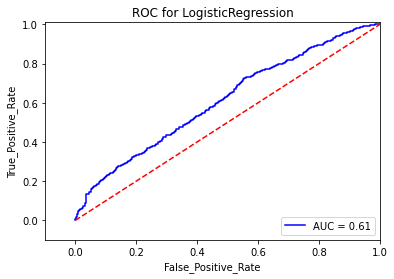

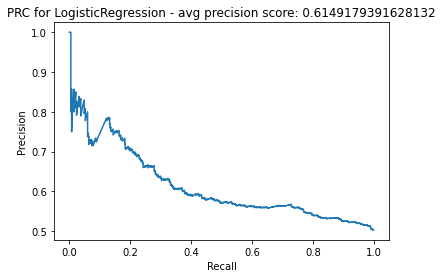

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

============================= KNearest =============================
Mean cross validation score: 0.6556875
Mean precision score: 0.6532235716452234
Mean Recall score: 0.6487499999999999
Mean ROC-AUC score: 0.6521250000000001
Mean F1 score: 0.6508456357556748
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6551724137931034
confusion matrix for the real test set:
 [[661 339]
 [351 650]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      1000
           1       0.66      0.65      0.65      1001

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.66      2001
weighted avg       0.66      0.66      0.66      2001



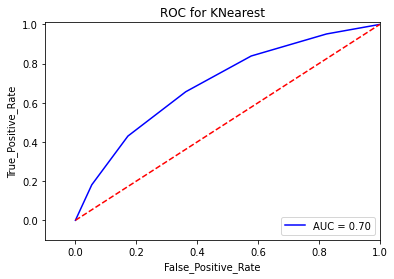

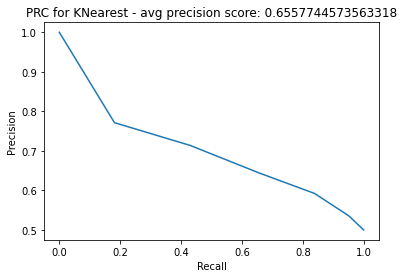

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= Support Vector Classifier =============================
Mean cross validation score: 0.5489999999999999
Mean precision score: 0.532451426425217
Mean Recall score: 0.8872499999999999
Mean ROC-AUC score: 0.55375
Mean F1 score: 0.6650486011715493
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.545727136431784
confusion matrix for the real test set:
 [[203 797]
 [112 889]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.64      0.20      0.31      1000
           1       0.53      0.89      0.66      1001

    accuracy                           0.55      2001
   macro avg       0.59      0.55      0.49      2001
weighted avg       0.59      0.55      0.49      2001

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.6135
Mean precision score: 0.6178701870088666
Mean Recall score: 0.627500000

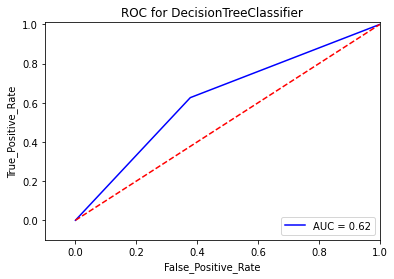

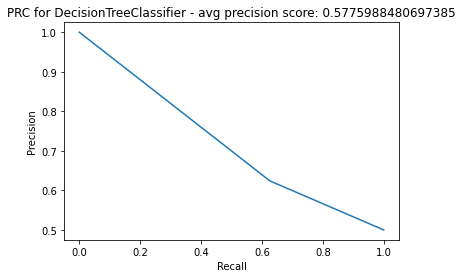

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.52409375
Mean precision score: 0.513559225567108
Mean Recall score: 0.9477499999999999
Mean ROC-AUC score: 0.525
Mean F1 score: 0.6661448185976272
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5232383808095952
confusion matrix for the real test set:
 [[ 99 901]
 [ 53 948]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.10      0.17      1000
           1       0.51      0.95      0.67      1001

    accuracy                           0.52      2001
   macro avg       0.58      0.52      0.42      2001
weighted avg       0.58      0.52      0.42      2001



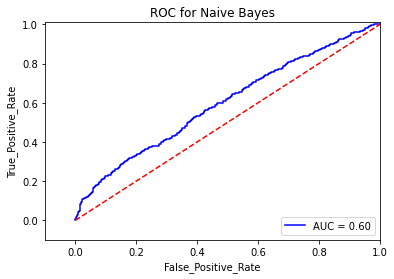

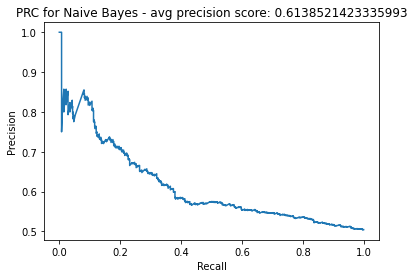

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

============================= Random forests =============================
Mean cross validation score: 0.66065625
Mean precision score: 0.6617638039652537
Mean Recall score: 0.65875
Mean ROC-AUC score: 0.6608750000000001
Mean F1 score: 0.6601666698263818
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6736631684157921
confusion matrix for the real test set:
 [[687 313]
 [340 661]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      1000
           1       0.68      0.66      0.67      1001

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



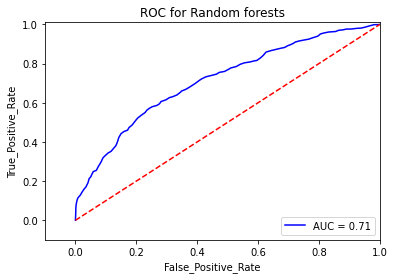

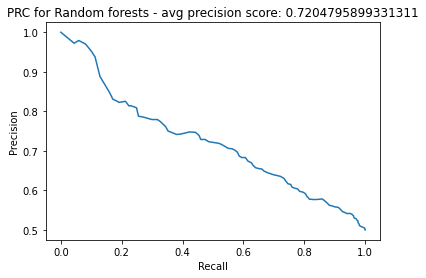

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.6869062500000002
Mean precision score: 0.6872528243161621
Mean Recall score: 0.6925000000000001
Mean ROC-AUC score: 0.6886249999999999
Mean F1 score: 0.6897589135923645
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6871564217891054
confusion matrix for the real test set:
 [[676 324]
 [302 699]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      1000
           1       0.68      0.70      0.69      1001

    accuracy                           0.69      2001
   macro avg       0.69      0.69      0.69      2001
weighted avg       0.69      0.69      0.69      2001



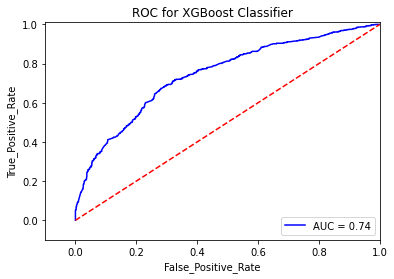

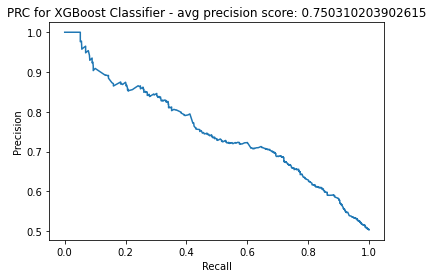

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.6880625
Mean precision score: 0.6904914884323471
Mean Recall score: 0.69425
Mean ROC-AUC score: 0.6915
Mean F1 score: 0.6923095834423914
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6911544227886057
confusion matrix for the real test set:
 [[679 321]
 [297 704]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.69      0.70      0.69      1001

    accuracy                           0.69      2001
   macro avg       0.69      0.69      0.69      2001
weighted avg       0.69      0.69      0.69      2001



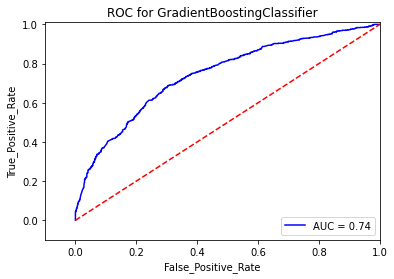

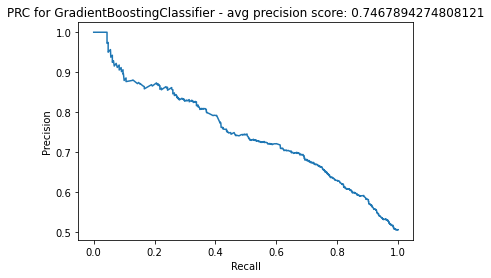

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

============================= MLP Classifier =============================
Mean cross validation score: 0.63434375
Mean precision score: 0.6207611206679285
Mean Recall score: 0.7022499999999999
Mean ROC-AUC score: 0.63625
Mean F1 score: 0.6578419727439505
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6426786606696652
confusion matrix for the real test set:
 [[576 424]
 [291 710]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62      1000
           1       0.63      0.71      0.67      1001

    accuracy                           0.64      2001
   macro avg       0.65      0.64      0.64      2001
weighted avg       0.65      0.64      0.64      2001



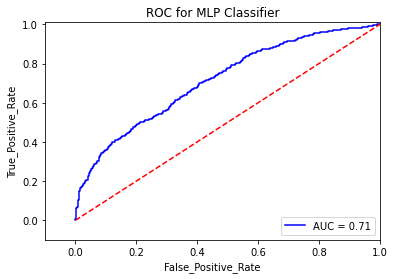

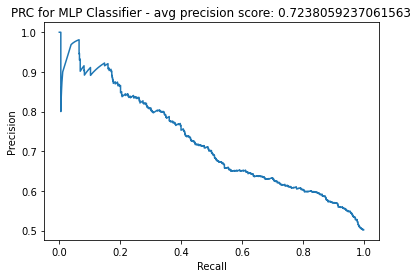

In [0]:
run_models()

*Make Predictions*

In [0]:
def get_df(text, btc, fc, htc, mtc, pof):
  data = {'text': [text]}
  test_data = pd.DataFrame(data)

	# Add the cleaned columns
  test_data['text'] = test_data["text"].map(lambda x: text_cleaning(x))
  test_data['num_contraction'] = test_data['text'].apply(num_contraction)
  test_data['total_stop_words'] = test_data['text'].apply(total_stop_words)
  test_data['stop_words'] = test_data['text'].apply(stop_words)
  test_data['pos'] = test_data['text'].apply(part_of_speech)
  test_data['senti'] = test_data['text'].apply(sentiment)
  test_data['barelytruecounts'] = btc
  test_data['falsecounts'] = fc		
  test_data['halftruecounts']= htc
  test_data['mostlytrueocunts'] = mtc 
  test_data['pantsonfirecounts'] = pof	
  headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
  test_data = update_lda_results_to_dataset(test_data, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
  test_data = test_data.drop(['text','pos','topic_top_words'], axis=1)

  return test_data

In [0]:
# Saving the model using pickle
import pickle

classifier = classifiers['Random forests']
writing_style_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/writing_Style.pickle'

pickle.dump(classifier, open(writing_style_model_path, 'wb'))

In [0]:
writing_style_model = pickle.load(open(writing_style_model_path, "rb"))

In [0]:
def predict(text, btc, fc, htc, mtc, pof):
  test_data = get_df(text, btc, fc, htc, mtc, pof)
  return classifiers['Random forests'].predict(test_data), classifiers['Random forests'].predict_proba(test_data)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([0,1])

def Shecodes_getWritingStyleScore(text,btc, fc, htc, mtc, pof):

  pred, prediction_prob = predict(text, btc, fc, htc, mtc, pof)
  print (pred)
  print ("Predicted classification: {}".format(le.inverse_transform(pred)[0]))
  print ("Prediction probabilities {} : {}".format(le.inverse_transform([0,1]), prediction_prob))

  truth_score = (prediction_prob[0][0] * 0.5)
  fake_score = (prediction_prob[0][1] * 0.5)

  if (truth_score > fake_score):
    if (truth_score > 1):
      truth_score = 1
    print ("Fakeness Score: {}".format(1 - truth_score))
    return 1 - truth_score
  else:
    if (fake_score > 1):
      fake_score = 1
    print ("Fakeness Score: {}".format(fake_score))
    return fake_score



Now let us pass a test news content to identify the fakeness of the news.

In [0]:
writing_score = Shecodes_getWritingStyleScore("The advisers sought to turn the low unemployment rate into a selling point to African-American voters, claiming they had more opportunities for jobs with higher wages.", 0 ,0 ,1,3,2)
print (writing_score)

[0]
Predicted classification: 0
Prediction probabilities [0 1] : [[0.83 0.17]]
Fakeness Score: 0.585
0.585


#Feature 14: Misleading Intent

In [0]:
df_new = df_final.copy()
df_new.shape

In [0]:
import numpy as np
import pandas as pd

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [0]:
df_new.head()

In [0]:
X_train = df_new["text"]
Y_train = df_new["label"]

In [0]:
label_count = pd.crosstab(X_train,Y_train,margins=True)
label_count.head()

In [0]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

def labelled_sentences(articles, label_type):
    labelledSentences = []
    for i,_d in enumerate(articles):
        labelledSentences.append(LabeledSentence(_d, label_type[i]))
    return labelledSentences

In [0]:
df_train_labelled = labelled_sentences(X_train,Y_train)
df_train_labelled[:10]

In [0]:
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(X_train)]

In [0]:
tagged_data_words=[x.words for x in tagged_data]
tagged_data_words_1D=[]
for row in range(len(tagged_data_words)):
    for col in range(len(tagged_data_words[row])):
        tagged_data_words_1D.append(tagged_data_words[row][col])

In [0]:
n_dim=300
w2v = Word2Vec(size=n_dim, min_count=0)
w2v.build_vocab(tagged_data_words)
w2v.train(tagged_data_words,total_examples=w2v.corpus_count,epochs=w2v.epochs)

In [0]:
df_train_statements=df_new[['text','label']]
df_train_statements_vectorized=df_train_statements['text'].map(lambda x: [w2v[w] for w in x])

In [0]:
df_train_statements['text']=df_train_statements_vectorized

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train_statements['label']=le.fit_transform(df_train_statements['label'])

In [0]:
df_train_statements.head()

In [0]:
def document_vector(doc):
    return np.mean(doc, axis=0)

In [0]:
for row_idx in range(len(df_train_statements['text'])):
    for col_idx in range(len(df_train_statements['text'][row_idx])):
        df_train_statements['text'][row_idx][col_idx]=document_vector(df_train_statements['text'][row_idx][col_idx])

In [0]:
df_train_statements.drop(index=4497,inplace=True)
df_train_statements.reset_index(drop=True)

In [0]:
df_doc2vec = df_new
df_doc2vec = df_doc2vec[['text','label']]
df_doc2vec = df_doc2vec[pd.notnull(df_doc2vec['text'])]
df_doc2vec.head(10)

In [0]:
df_doc2vec['text'].apply(lambda x: len(x.split(' '))).sum() ###

In [0]:
cnt_pro = df_doc2vec['label'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countV = CountVectorizer(stop_words='english', min_df=2, max_df=20, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
 
train_count = countV.fit_transform(df_new['text'].values)
#test_count = countV.fit_transform(df_test['statement'].values)
print('COUNT VECTORIZER')


countVPlurals= countV.get_feature_names()
stemmer = PorterStemmer()
countVSingles= [stemmer.stem(plural) for plural in countVPlurals]


countVTokens = list(set(countVSingles))
print('countVTokens')
print(countVTokens)
print('------------------------------------------')
                         

tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
train_tfidf = tfidfV.fit_transform(df_new['text'].values)
#test_tfidf = tfidfV.fit_transform(df_test['statement'].values)

print('TF-IDF VECTORIZER')


tfidfVPlurals= tfidfV.get_feature_names()
tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

tfidfVTokens = list(set(tfidfVSingles))
print('TFIDFV Tokens')
print(tfidfVTokens)

In [0]:
count_df = pd.DataFrame(df_new['text'], columns=countV.get_feature_names())
#tfidf_df = pd.DataFrame(df_test['statement'], columns=tfidfV.get_feature_names())
#difference = set(count_df.columns) - set(tfidf_df.columns)
#difference
#print(count_df.equals(tfidf_df))
count_df.tail()
#tfidf_df.head()

In [0]:
texts=[]
for x in df_train_statements['text'].values:
    texts.append(x)   
X=pd.DataFrame(texts)
X=X.fillna(0)
y=df_train_statements[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dec_pred = clf_gini.predict(X_test)
accuracy_score =  clf_gini.score(X_test, y_test)
print ("Accuracy Score:", accuracy_score)

print(metrics.classification_report(y_test,dec_pred))

In [0]:
num_trees=200

rf=RandomForestClassifier(n_estimators=num_trees)
rf_pred= rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
accuracy_score = rf.score(X_test, y_test)
print ("Accuracy Score:", accuracy_score)
print(metrics.classification_report(y_test,rf_pred))

In [0]:
nb_pipeline = Pipeline([
        ('NBCV',tfidfV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_nb_tf = nb_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_nb_tf == df_doc2vec['label'])

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_nb_tf)
print('Confusion Matrix for the Naive Bayes algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report Naive Bayes Algorithm is: \n')
print(classification_report(df_doc2vec['label'], predicted_nb_tf))

In [0]:
logR_pipeline = Pipeline([
        ('LogRCV', tfidfV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_lr_tf = logR_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_lr_tf == df_doc2vec['label'])

In [0]:
import pickle
rf_pipeline = Pipeline([
        ('rftf',tfidfV),
        ('random_clf',RandomForestClassifier(n_estimators=num_trees))])

rf_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_rf_tf = rf_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_rf_tf == df_doc2vec['label'])
asha_misleading_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/asha_misleading.pickle'
pickle.dump(rf_pipeline, open(asha_misleading_model_path, 'wb'))


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_rf_tf)
print('Confusion Matrix for the Random Forest Algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Random Forest Algorithm is: \n')
print(classification_report(df_doc2vec['label'], predicted_rf_tf))

In [0]:
#we got maximum Accuracy in Random Forest

def getMisleadingIntention(content):
    rf_pipeline = Pipeline([
            ('rfcv',countV),
            ('random_clf',RandomForestClassifier(n_estimators=num_trees))])

    rf_pipeline.fit(df_doc2vec['statement'],df_doc2vec['label'])
    predicted_rf_cv = rf_pipeline.predict([content])
    return predicted_rf_cv[0]

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english', min_df=2, max_df=20, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')),
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),  
])
pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])

In [0]:
import itertools
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_nb_tf)
print('Confusion Matrix for the Naive Bayes algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report Naive Bayes Classifier TF-IDF is:: \n')
print(classification_report(df_doc2vec['label'], predicted_nb_tf))

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_lr_tf)
print('Confusion Matrix for Logistic Regression Classifier is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression Classifier TF-IDF is: \n')
print(classification_report(df_doc2vec['label'], predicted_lr_tf))

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_rf_tf)
print('Confusion Matrix for the Random Forest Algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Random Forest Classifier TF-IDF is: \n')
print(classification_report(df_doc2vec['label'], predicted_rf_tf))

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [0]:
asha_misleading_model= pickle.load(open(asha_misleading_model_path, "rb"))

In [0]:
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk.corpus 
from nltk.tokenize import word_tokenize
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as matplot_plt
import seaborn as seaborn_lib; seaborn_lib.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pickle
import nltk
import os.path
from os import path
from sklearn.externals import joblib

class MisleadingIntentions():

  # Constructor deceleration of MisleadingIntentions class
  def __init__(self):
    self.data = {}
    
  # Function to process the data 
  def process_data(self):
    column_names = ['id', 'label', 'statement', 'subjects', 'speaker','speaker_job title', 'state info', 'party affiliation', 'barely_true_counts','false_counts', 'half_true_counts',
           'mostly_true_counts', 'pants_on_fire_counts','context']
    liar_data_train = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv', sep='\t', names = column_names, error_bad_lines=False)   
    return liar_data_train

  # Function to clean the data 
  def clean_data(self, liar_data_train):
    drop_columns = ['id','subjects', 'speaker', 'context','speaker_job title', 'state info','party affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts',
                   'mostly_true_counts', 'pants_on_fire_counts']
    df_train = liar_data_train.drop(columns=drop_columns)
    return df_train

  # Functio to convert categorical column to numeric
  def convertToBinary(self, v):
    value = v['label']
    if (value == 'true'):
        return '0'
    if (value == 'mostly-true'):
        return '1'
    if (value == 'half-true'):
        return '2'
    if (value == 'barely-true'):
        return '3'
    if (value == 'false'):
        return '4'
    if (value == 'pants-fire'):
        return '5' 

  # Function to perform lemmatize and stemmer:
  def lemmatize_stemming(self, text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

  # Function to pre-process:
  def preprocess(self, text):
      result = []
      for token in gensim.utils.simple_preprocess(text):
          if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
              result.append(self.lemmatize_stemming(token))
      return result  

  # Function to label the sentences
  def labelled_sentences(self, articles, label_type):
    labelledSentences = []
    for i,_d in enumerate(articles):
        labelledSentences.append(LabeledSentence(_d, label_type[i]))
    return labelledSentences
    
  # Function for doc vector
  def document_vector(self, doc):
    return np.mean(doc, axis=0)
    
  # Function for doc2vec
  def doc2vector(self,df_train):
    df_doc2vec = df_train
    df_doc2vec = df_doc2vec[['statement','label']]
    df_doc2vec = df_doc2vec[pd.notnull(df_doc2vec['statement'])]
    return df_doc2vec

  # Function to get Content Category
  def getCategory(self, value):
    if (value == '0'):
        return 'Category: true'
    if (value == '1'):
        return 'Category: mostly-true'
    if (value == '2'):
        return 'Category: half-true'
    if (value == '3'):
        return 'Category: barely-true'
    if (value == '4'):
        return 'Category: false'
    if (value == '5'):
        return 'Category: pants-fire' 

  # Fucntion to combine the process
  def complete_process(self):
    liar_data_train = object_mislead.process_data()
    df_train = object_mislead.clean_data(liar_data_train)
    df_train['label'] = df_train.apply(object_mislead.convertToBinary, axis=1)  
    doc2vec = object_mislead.doc2vector(df_train)
    return doc2vec
    
  # Function to store the trained model
  def store_trained_model(self, df_doc2vec):
    countV = CountVectorizer(stop_words='english', min_df=2, max_df=20, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
    num_trees=200
    model_filename = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/asha_misleading.pickle'
    rf_pipeline = Pipeline([
            ('rfcv',countV),
            ('random_clf',RandomForestClassifier(n_estimators=num_trees))])
    rf_pipeline.fit(df_doc2vec['statement'],df_doc2vec['label'])
    joblib.dump(rf_pipeline, model_filename)

  # Function to predict by loading the stored mode;
  def getMisleadingIntention(self, content):
      XGBoost_from_joblib = joblib.load('/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/asha_misleading.pickle') 
      predicted_rf_cv = XGBoost_from_joblib.predict([content])
      value = predicted_rf_cv[0]
      output = ""
      if (value == '0'):
          output =  'true'
      if (value == '1'):
          output = 'mostly-true'
      if (value == '2'):
          output = 'half-true'
      if (value == '3'):
          output = 'barely-true'
      if (value == '4'):
          output = 'false'
      if (value == '5'):
          output = 'pants-fire'
      return output

In [0]:
object_mislead = MisleadingIntentions()

In [0]:
doc2vec = object_mislead.complete_process()

In [0]:
object_mislead.store_trained_model(doc2vec)

In [0]:
text = 'Hillary Clinton in 2005 co-sponsored legislation that would jail flag burners.'
value = object_mislead.getMisleadingIntention(text)
print(value)

Before Data Amalgamation 


  | Algo   |precision   |  recall |  F1 | accuracy | 
|---|---|---|---|---|
| Naive Bayes Doc2Vec | 0.57  |   0.40   |  0.47 | 0.48 
| Random Forest Doc2Vec  |  0.21  | 0.26  | 0.24   | 0.22
| Decision Tree Doc2Vec  |  0.20   | 0.85  | 0.32 |0.21
| Logistic Regression Doc2Vec | 0.57 |0.45 |0.50| 0.51
| Random Forest TF-IDF | 0.92 | 0.85  |  0.88 | 0.86 
| Logistic Regression TF-IDF |  0.57   |  0.45 |  0.50 | 0.51



After Data Amalgamation

  | Algo   |precision   |  recall |  F1 | accuracy | 
|---|---|---|---|---|
| Naive Bayes Doc2Vec | 0.81  |   0.91   |  0.86 | 0.85 
| Random Forest Doc2Vec  |  1.00  | 0.88  | 0.93   | 0.94
| Decision Tree Doc2Vec  |  0.88   | 0.67  | 0.63 |0.66
| Logistic Regression Doc2Vec | 0.86 |0.93 |0.89| 0.93
| Random Forest TF-IDF | 0.89 | 1.00  |  0.94 | 0.93 
| Logistic Regression TF-IDF |  0.91   |  0.79 |  0.84 | 0.85

# FINAL COMBINED MODEL

In [188]:
def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.88, 0.84, 0.56, 0.95, 0.35,  0.1 ,0.54, 0.98, 0.71, 0.6, 1] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    if (headline != ""):
      prob.append(w[0] * Shecodes_getTitleVsBodyScore(headline, text))
      sumW += w[0]

    prob.append(w[1] * DATAMINERS_getAuthorScore(numAuthors))
    sumW += w[1]
    if ( (headline != "") & (party != "")):
        prob.append(w[2] * DATAMINERS_getPartyAffiliationScore(headline, party))
        sumW += w[2]
    if (headline != ""):
        prob.append(w[3] * DATAMINERS_getClickbaitScore(headline))
        sumW += w[3]
    if (headline != ""):
        prob.append(w[4] * DATAMINERS_getSentimentAnalysisScore(headline))
        sumW += w[4]
    if (headline != ""):
        prob.append(w[5] * DATAMINERS_getLDATopicModellingScore(headline))
        sumW += w[5]
    if (headline != ""):
        prob.append(w[6] * DATAMINERS_getSensationalismScore(headline))
        sumW += w[6]
    if (headline != ""):
        prob.append(w[7] * DATAMINERS_getSpamScore(headline))
        sumW += w[7]
    prob.append(w[8] * DATAMINERS_getBodyLengthScore(len(text)))
    sumW += w[8]
    prob.append(w[9] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[9]
    if (party != ""):
        prob.append(w[10] * DATAMINERS_getSourceReputationScore(source))
        sumW += w[10]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if result <= 0.2:
  print("It is NOT Fake News!!!")
elif 0.2 < result and result <= 0.4:
  print("It may not be Fake news")
elif 0.4 < result and result <= 0.6:
  print("Neutral")
elif 0.6 < result and result <= 0.8:
  print("It may be Fake News")
else:
  print("It is Fake News!!!")

(1, 18)
(1, 18)
(1, 2)
(1, 2)
[2]
Multi label predicted classification: discuss
Multi label prediction probabilities ['agree' 'disagree' 'discuss' 'unrelated'] : [[0.36 0.18 0.4  0.06]]
(1, 18)
(1, 18)
(1, 2)
(1, 2)
[1]
Binary predicted classification: Fake
Binary label prediction probabilities ['True', 'Fake']: [[0.02916316 0.97083684]]
[2]
Overall Fakeness Score: {} 0.3845673670429468
It may not be Fake news


## Conclusion

Along with other inputs, if you pass in the title and text, our model generates the fakeness score. This score was used along with scores generated by other factors to generate the final fakeness score. We have also modified the polynomical function to classify the result into multiclass output. For example, if final score is in the range of 0.6 and 0.8, then the result may be a fake news in comparision with predicting it as Definitely fake if the score in the range of 0.8 to 1.